<a href="https://www.kaggle.com/code/gamzebayir/fraud-detection-correlation-anly-and-feature-imp?scriptVersionId=94143433" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Correlation Anaylsis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from lightgbm import LGBMClassifier

### Here we have disabled the warnings to avoid getting some warnings.

In [2]:
warnings.simplefilter("ignore")

### Adjustments have been made for the columns and columns to be displayed.

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Importing data from Dataset

In [4]:
train_transaction=pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv')
train_identity=pd.read_csv('../input/ieee-fraud-detection/train_identity.csv')
test_transaction=pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv')
test_identity=pd.read_csv('../input/ieee-fraud-detection/test_identity.csv')
sample_submission=pd.read_csv('../input/ieee-fraud-detection/sample_submission.csv')

### The data sets given separately were merged.

In [5]:
train_df = train_transaction.merge(train_identity, how="left", on="TransactionID")

test_df = test_transaction.merge(test_identity, how="left", on="TransactionID")

### The name mismatch between the Train and test datasets has been fixed.

In [6]:
test_df= test_df.rename(columns=lambda x:"_".join(x.split("-")))

### The corelation between the variables was examined.

In [7]:
def high_correlated_cols(dataframe, plot=True, corr_th=0.85):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        
        sns.set(rc={'figure.figsize': (25,25)})
        sns.heatmap(corr, cmap="RdBu_r", annot=True, fmt='.2f', square=True, linewidths=1,vmin = -1 , vmax = 1)
        plt.show()
    return drop_list

# V features

### Analyzing Vs Features

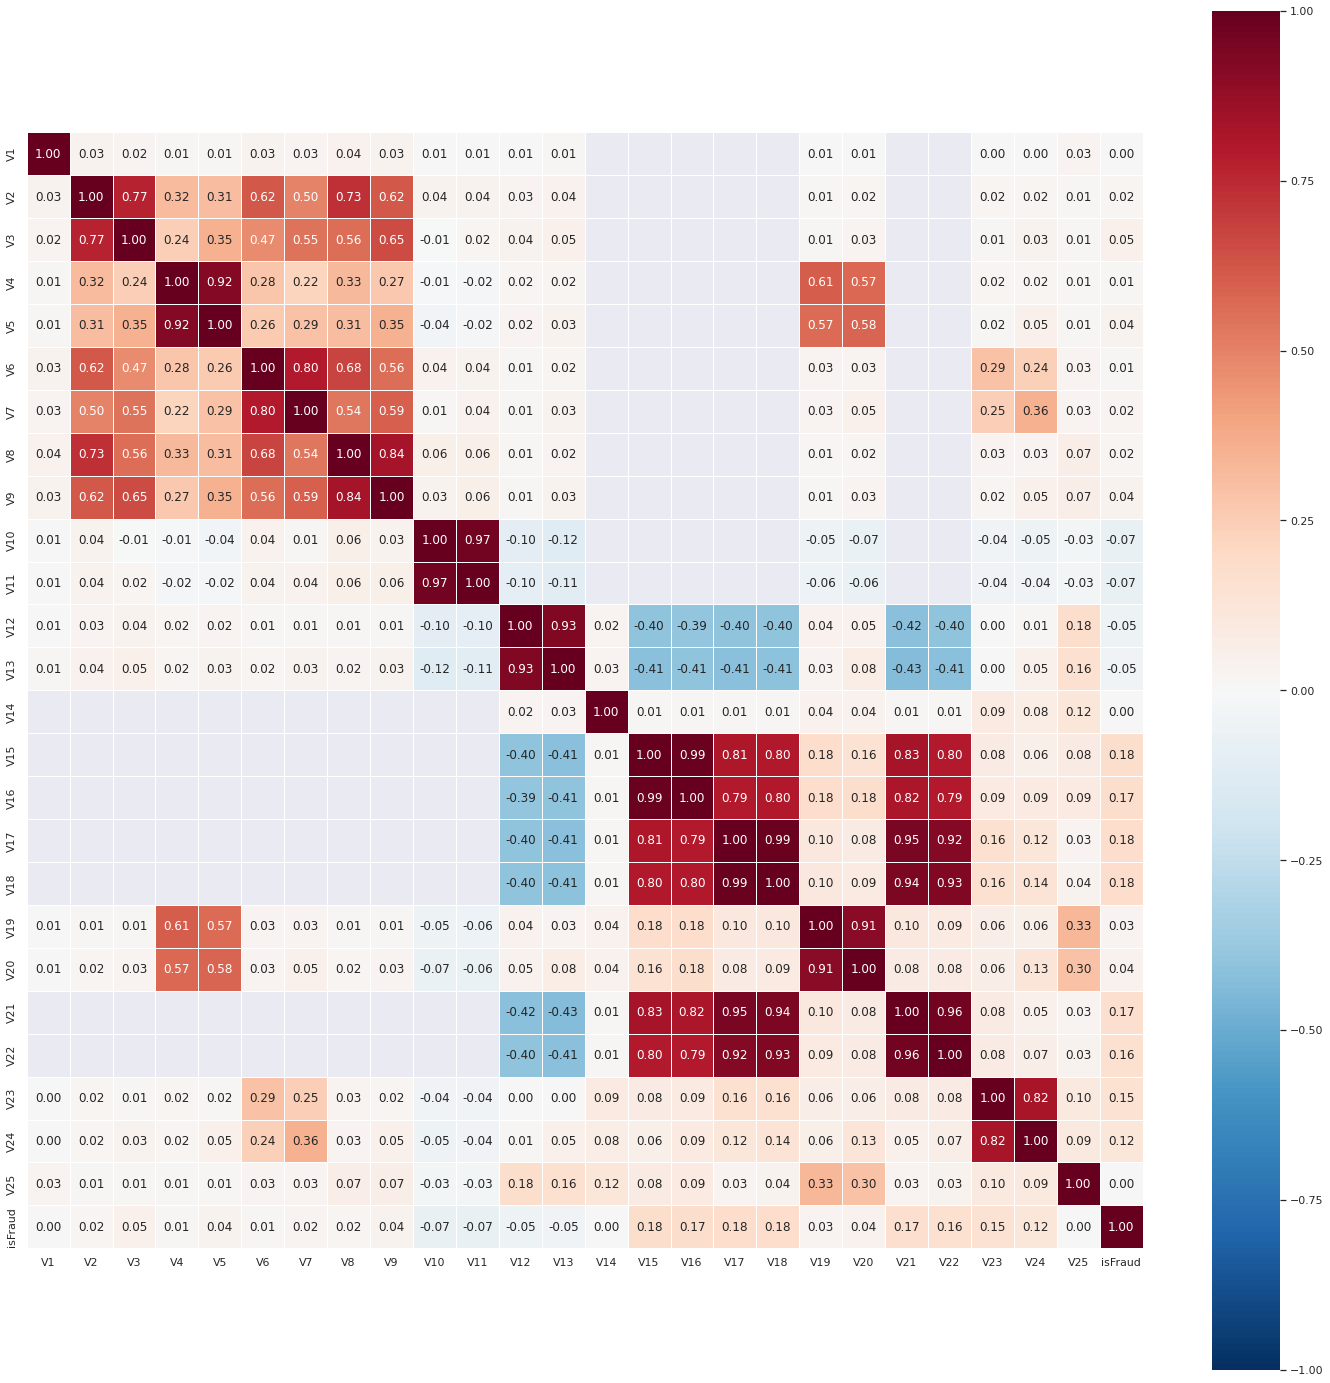

In [8]:
cols = ['V'+str(x) for x in range(1,26)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list1 = high_correlated_cols(train_df[cols], plot=False)


In [9]:
drop_list1

['V5', 'V11', 'V13', 'V16', 'V18', 'V20', 'V21', 'V22']

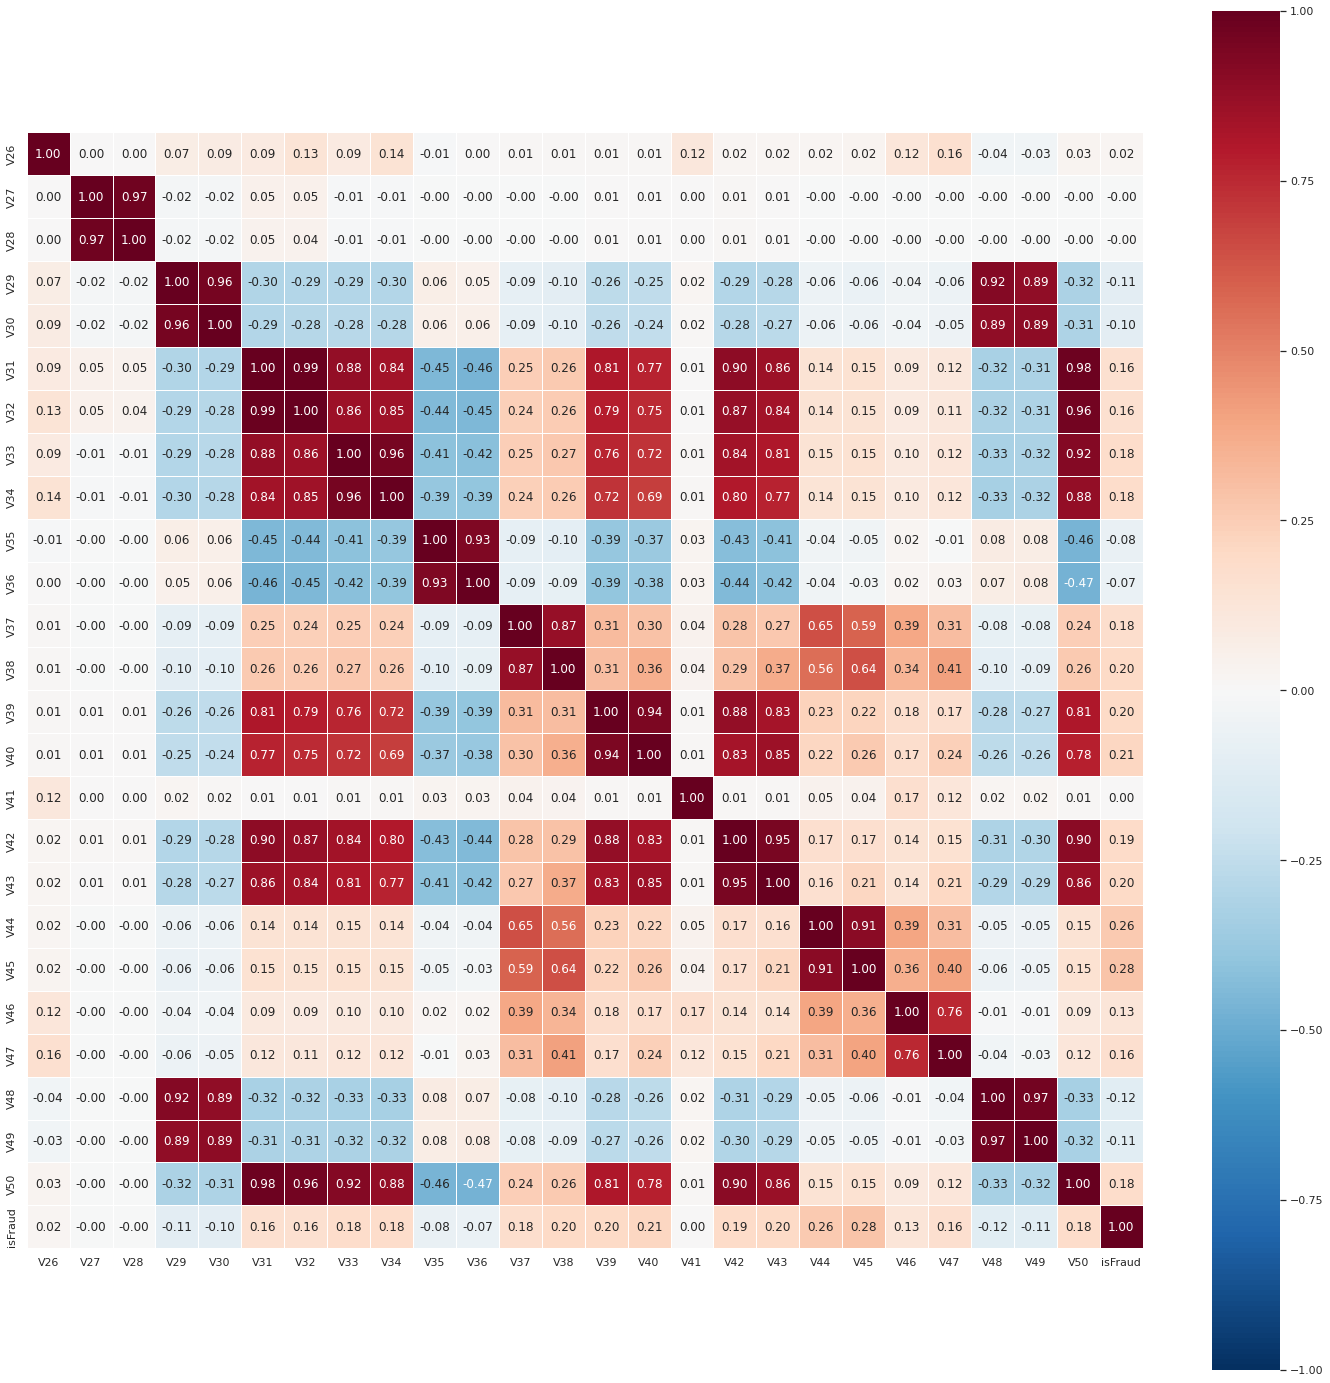

In [10]:
cols = ['V'+str(x) for x in range(26,51)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list2 = high_correlated_cols(train_df[cols], plot=False)

In [11]:
drop_list2

['V28',
 'V30',
 'V32',
 'V33',
 'V34',
 'V36',
 'V38',
 'V40',
 'V42',
 'V43',
 'V45',
 'V48',
 'V49',
 'V50']

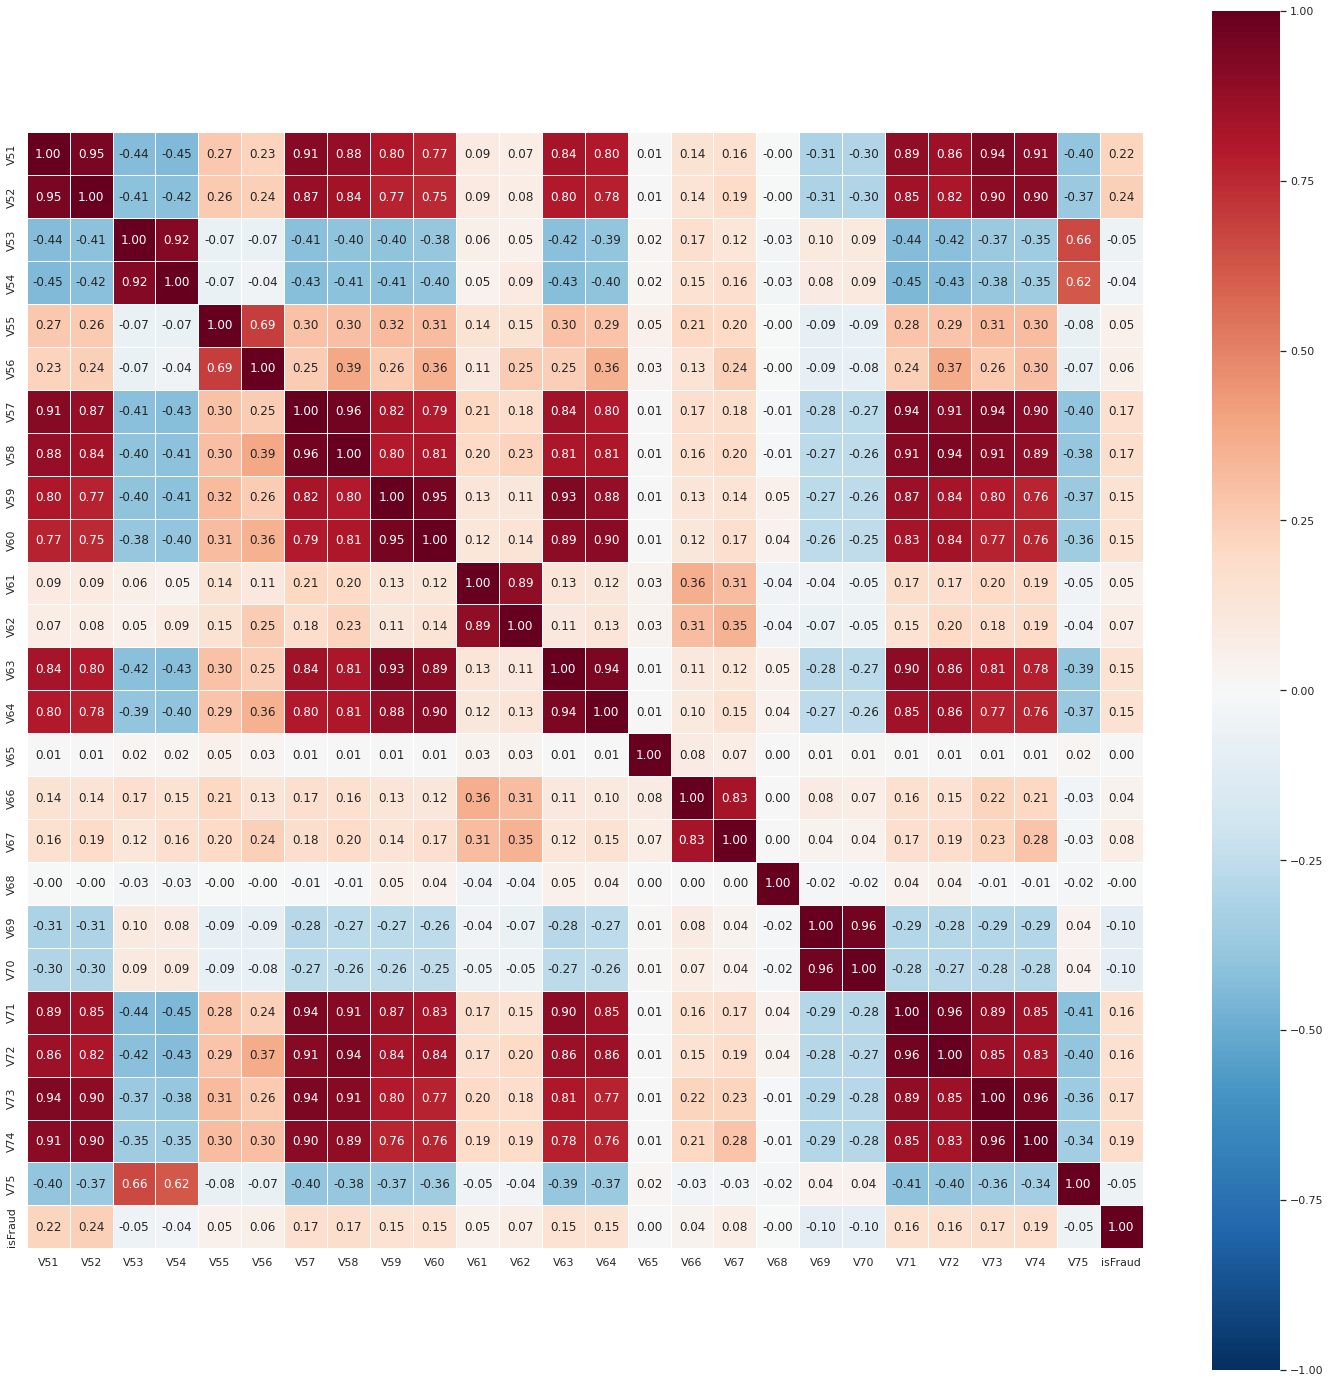

In [12]:
cols = ['V'+str(x) for x in range(51,76)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list3 = high_correlated_cols(train_df[cols], plot=False)

In [13]:
drop_list3

['V52',
 'V54',
 'V57',
 'V58',
 'V60',
 'V62',
 'V63',
 'V64',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74']

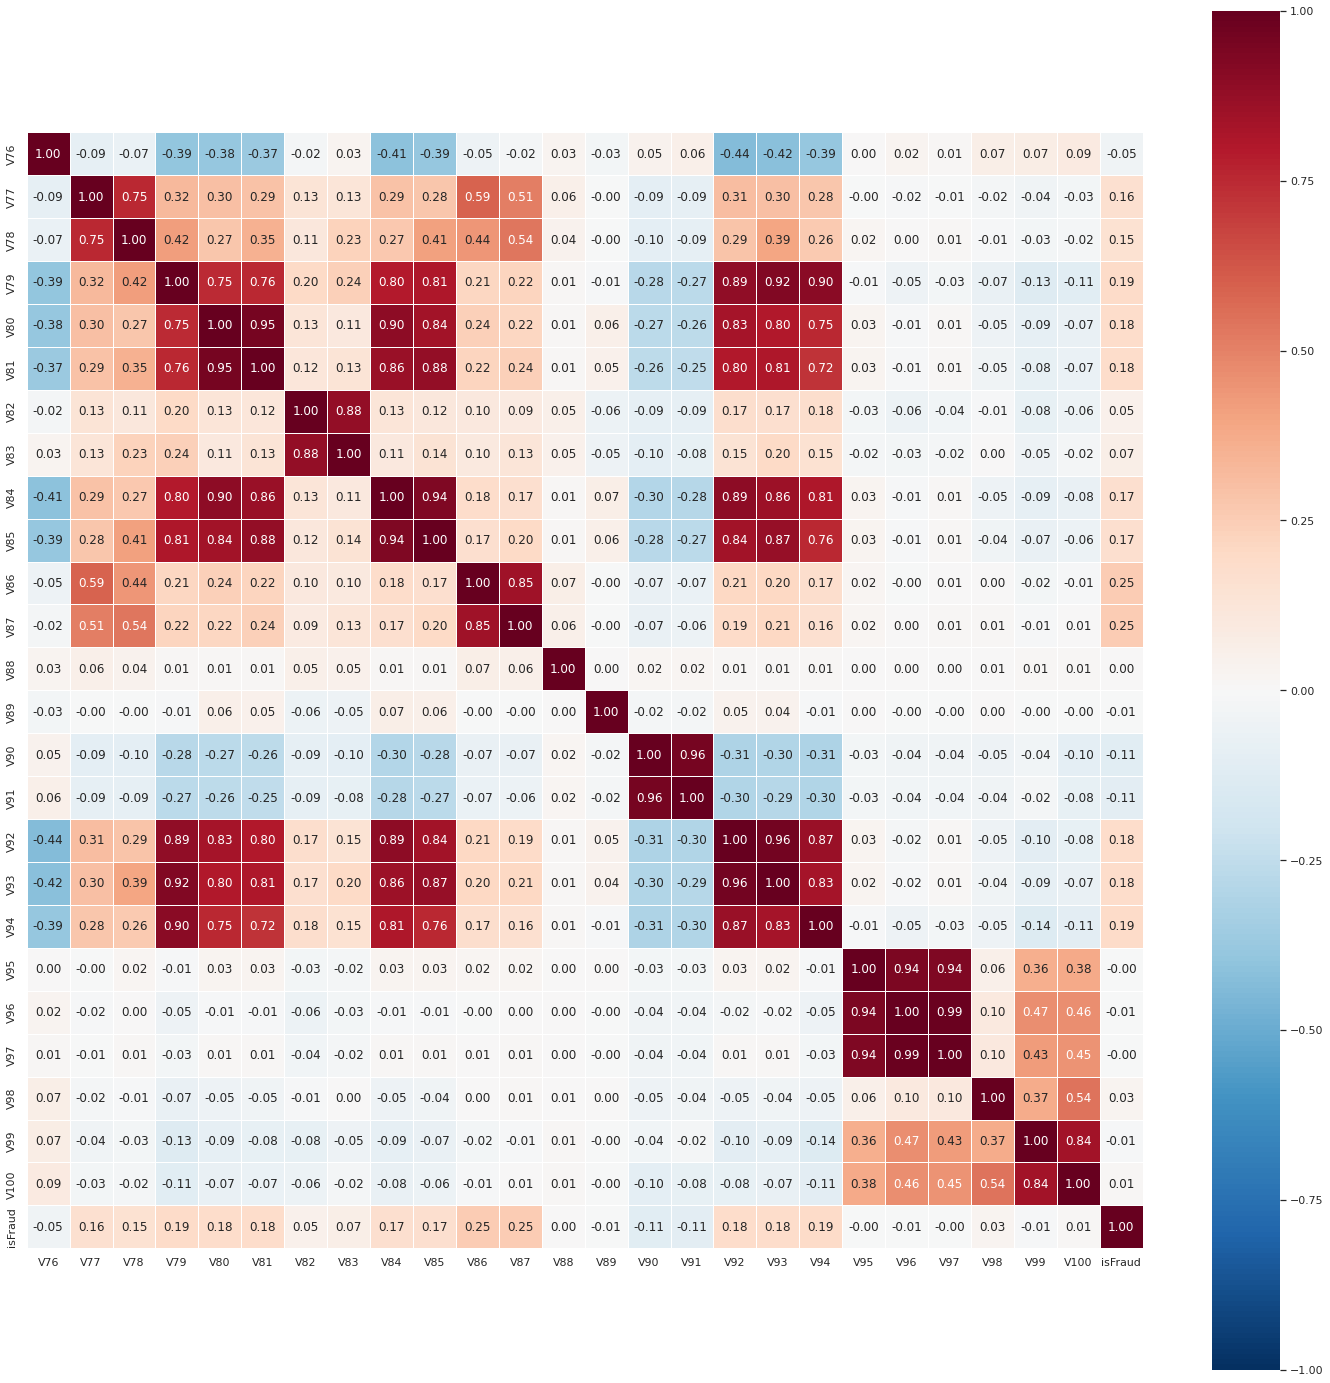

In [14]:
cols = ['V'+str(x) for x in range(76,101)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list4 = high_correlated_cols(train_df[cols], plot=False)

In [15]:
drop_list4

['V81', 'V83', 'V84', 'V85', 'V91', 'V92', 'V93', 'V94', 'V96', 'V97']

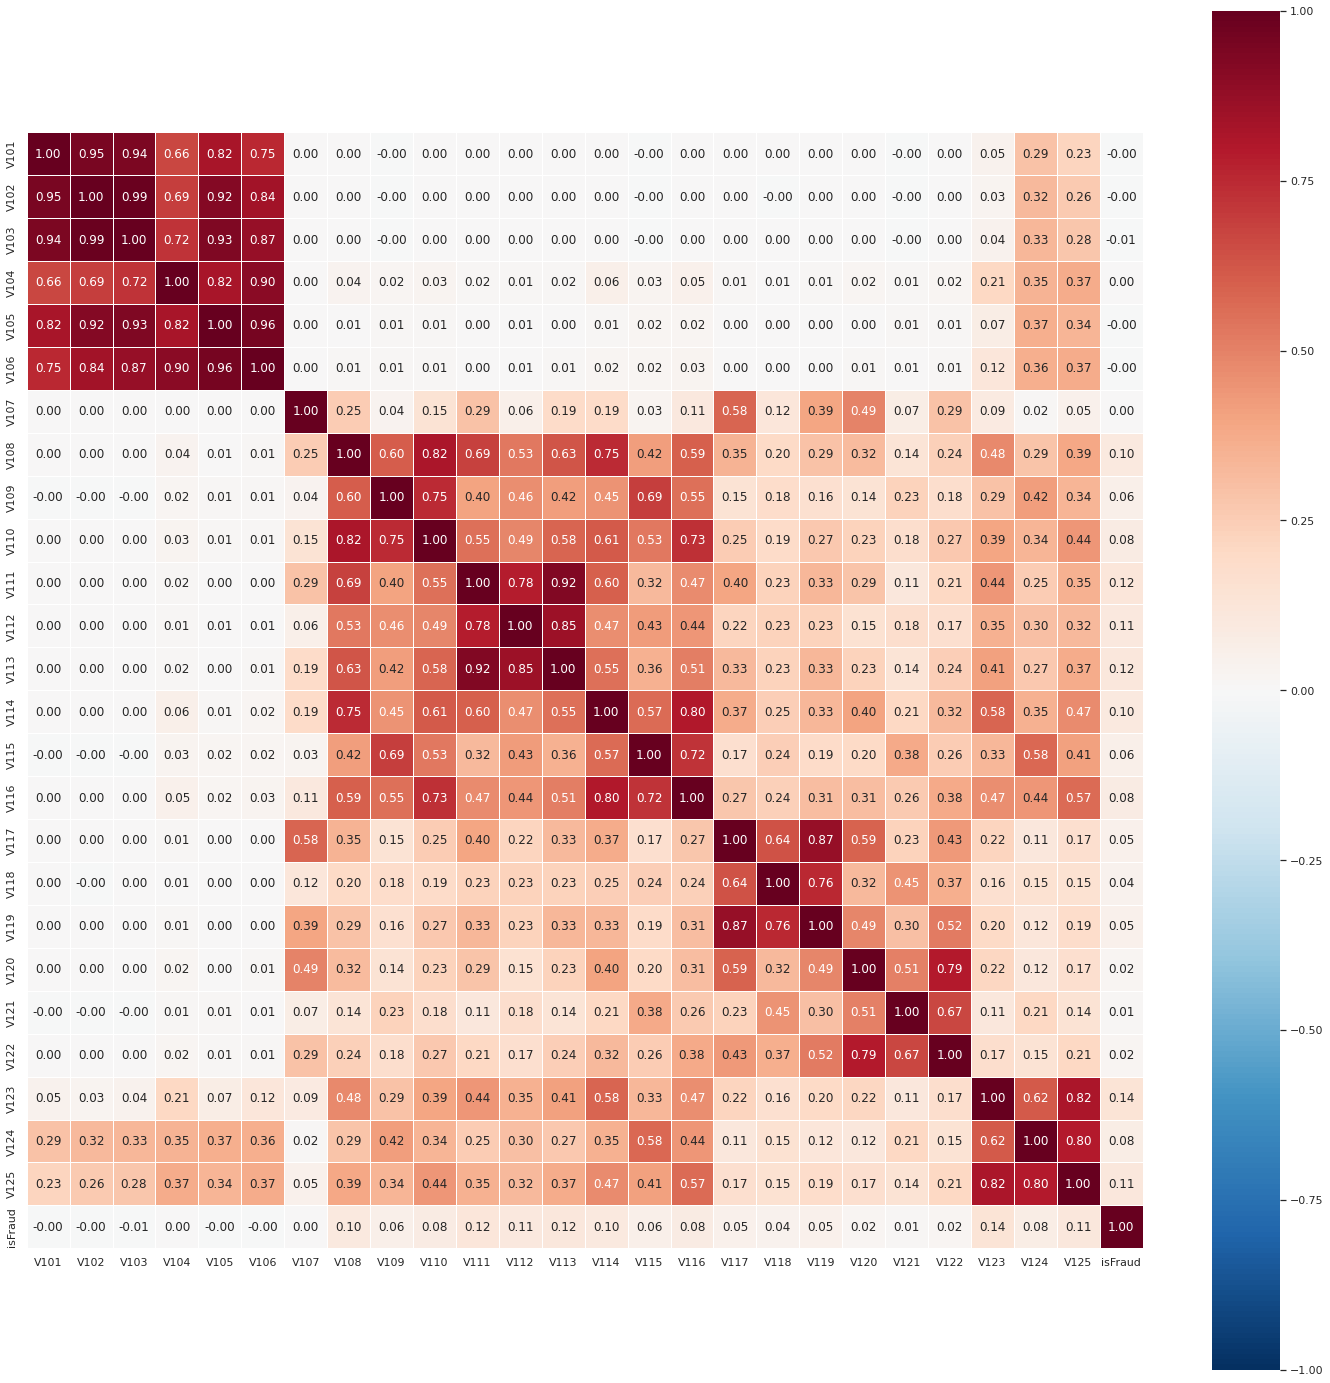

In [16]:
cols = ['V'+str(x) for x in range(101,126)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list5 = high_correlated_cols(train_df[cols], plot=False)

In [17]:
drop_list5

['V102', 'V103', 'V105', 'V106', 'V113', 'V119']

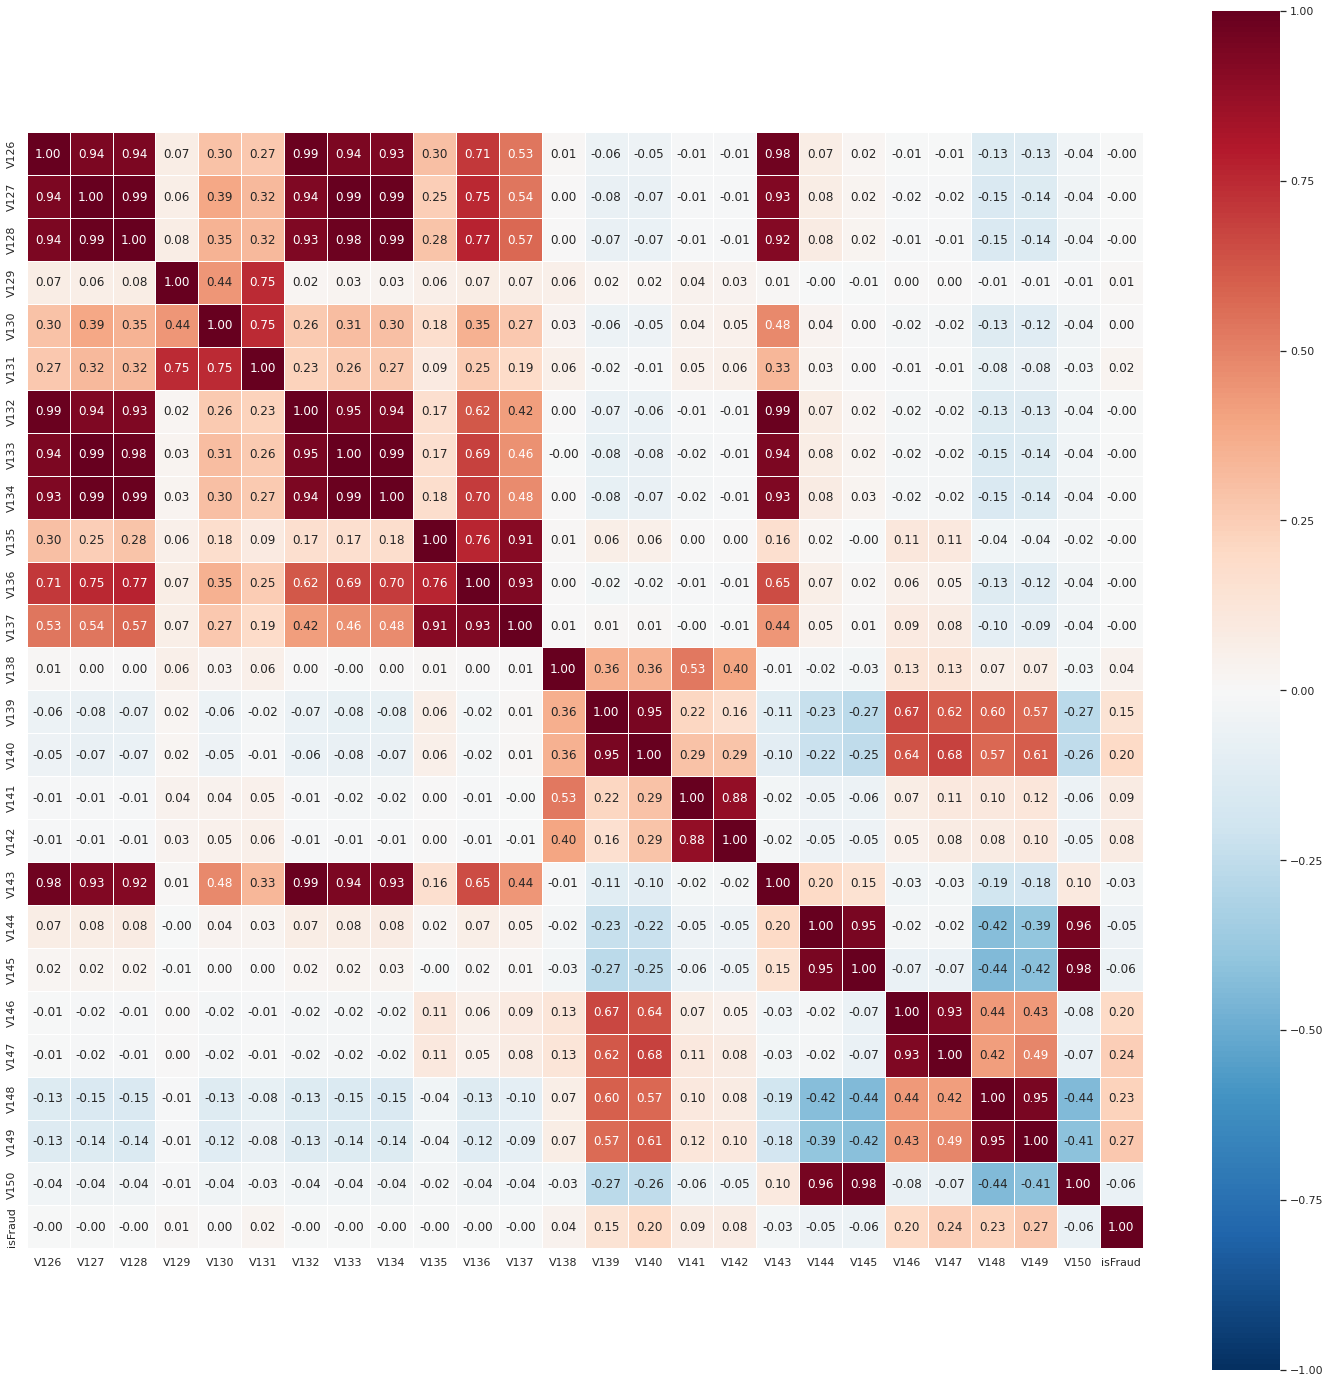

In [18]:
cols = ['V'+str(x) for x in range(126,151)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list6 = high_correlated_cols(train_df[cols], plot=False)

In [19]:
drop_list6

['V127',
 'V128',
 'V132',
 'V133',
 'V134',
 'V137',
 'V140',
 'V142',
 'V143',
 'V145',
 'V147',
 'V149',
 'V150']

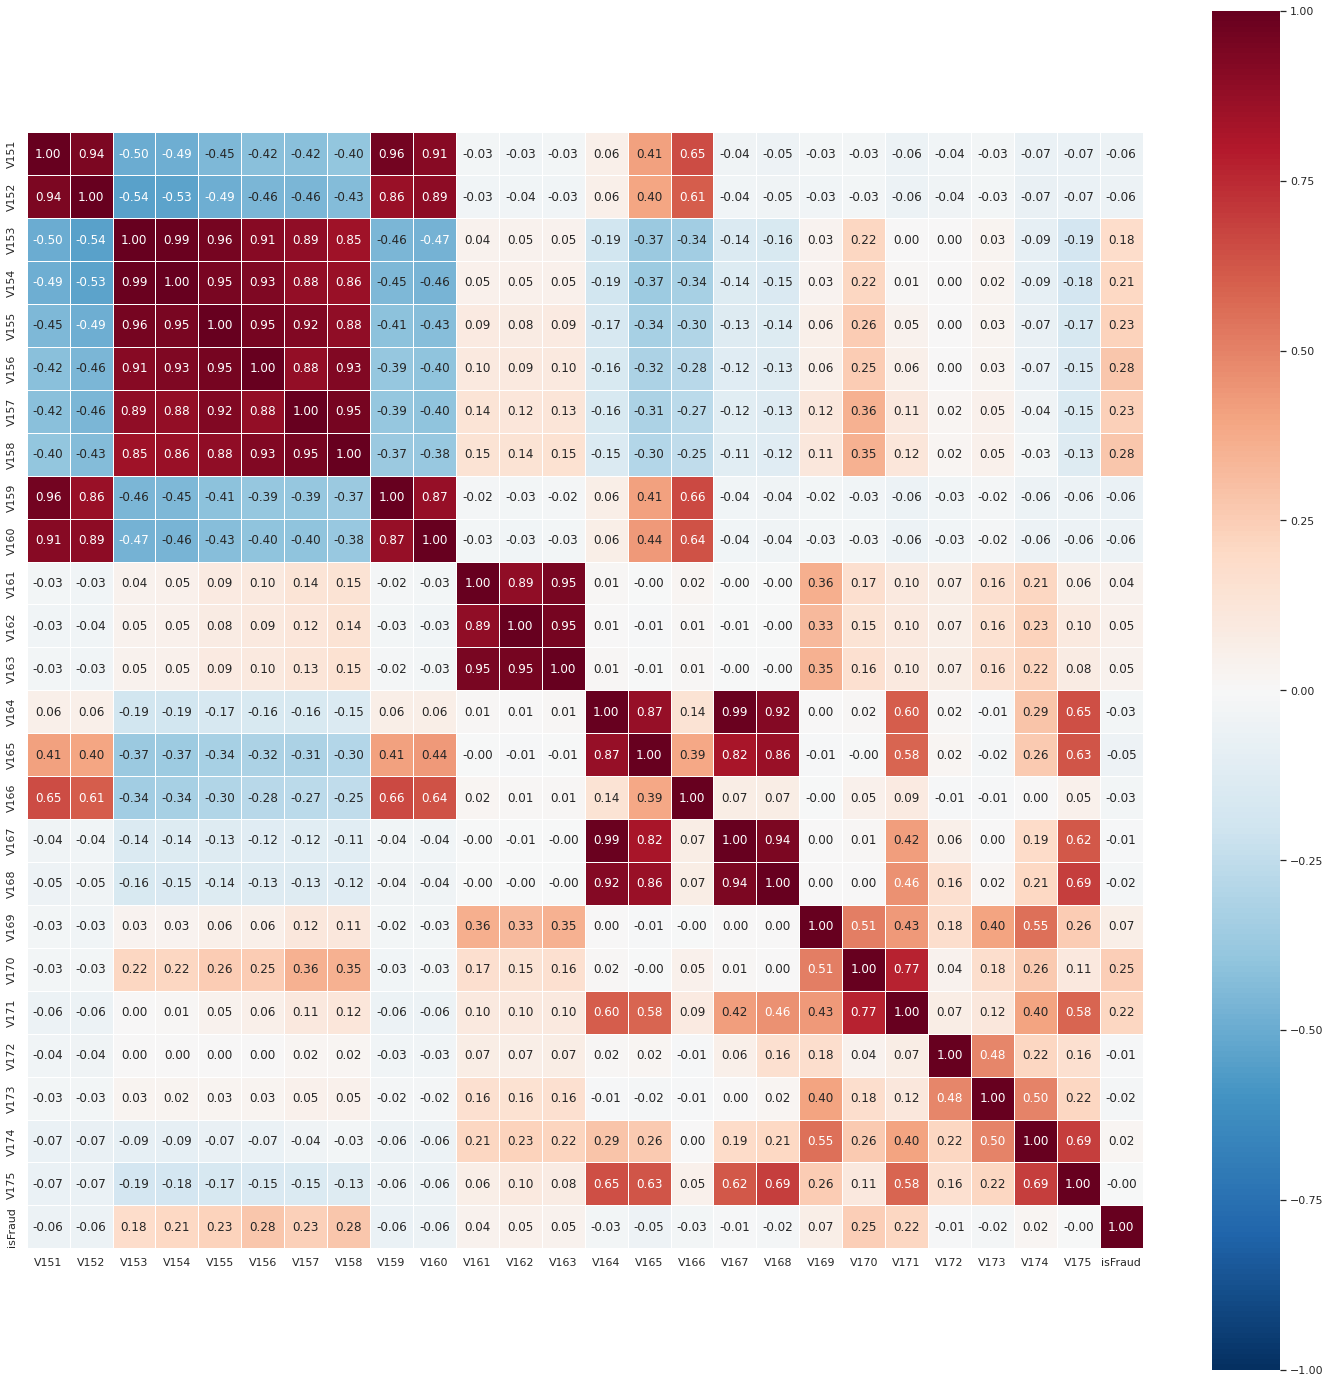

In [20]:
cols = ['V'+str(x) for x in range(151,176)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list7 = high_correlated_cols(train_df[cols], plot=False)

In [21]:
drop_list7

['V152',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V162',
 'V163',
 'V165',
 'V167',
 'V168']

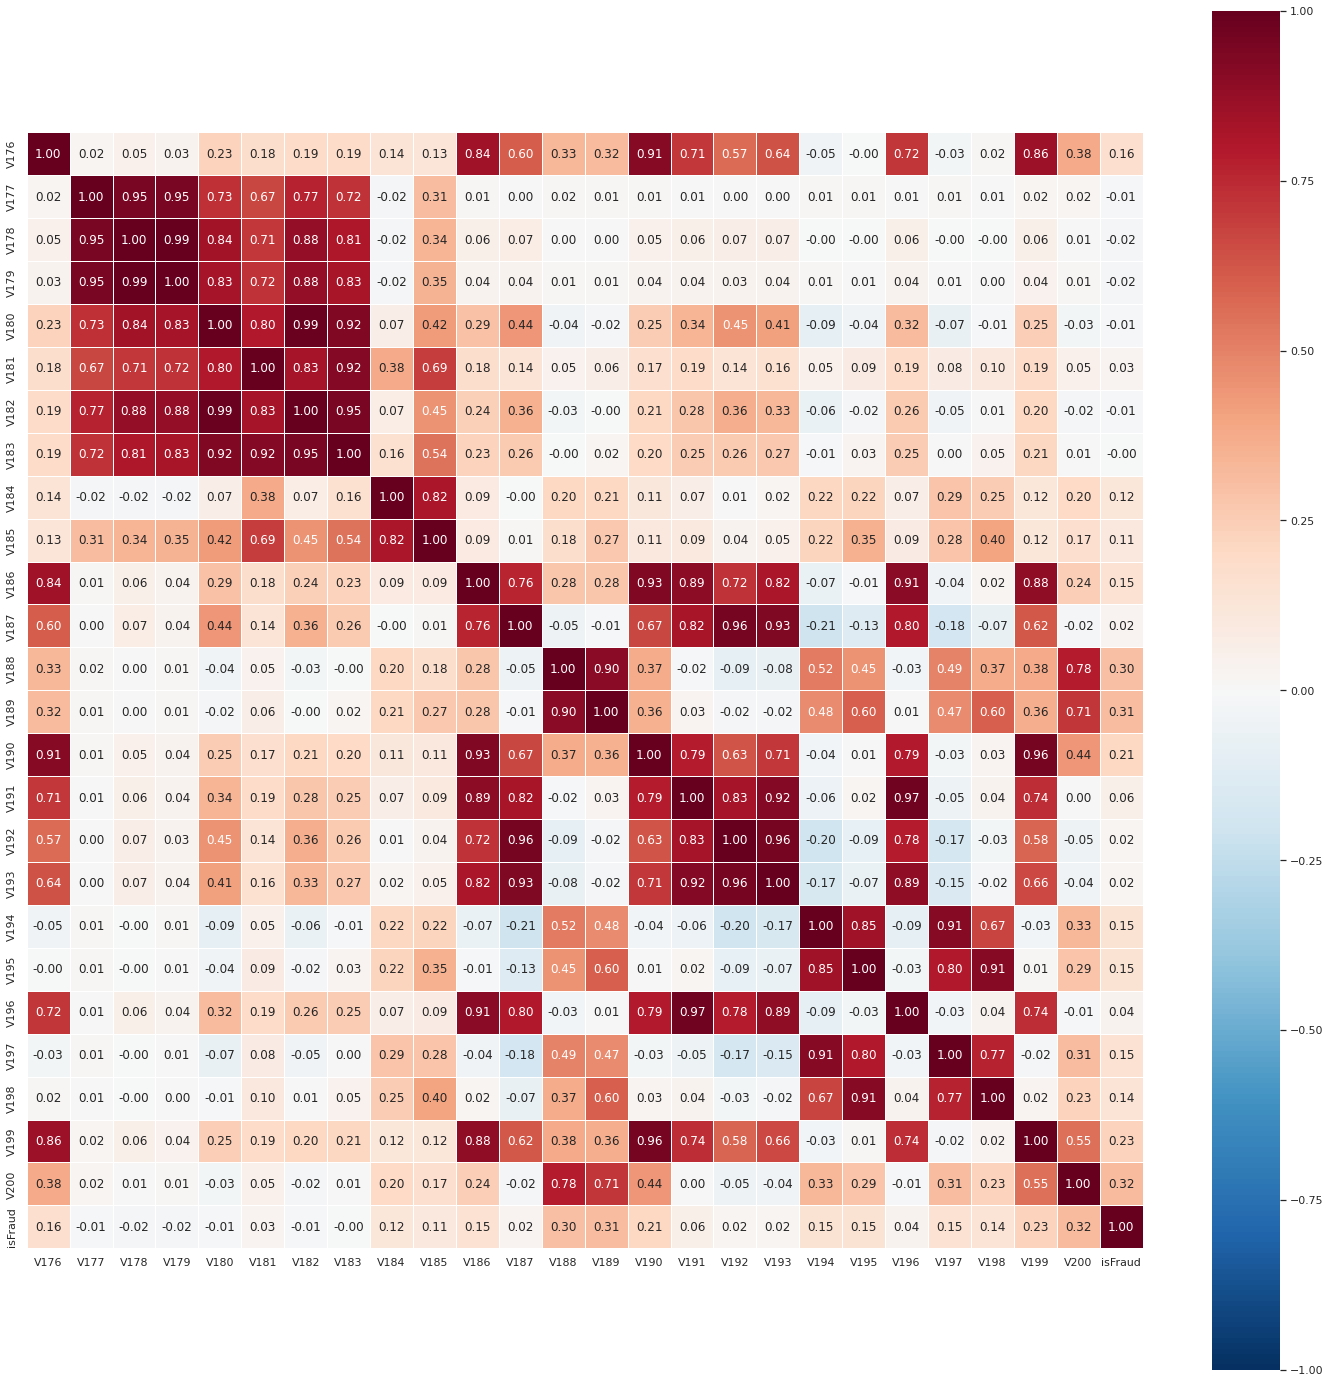

In [22]:
cols = ['V'+str(x) for x in range(176,201)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list8 = high_correlated_cols(train_df[cols], plot=False)

In [23]:
drop_list8

['V178',
 'V179',
 'V182',
 'V183',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199']

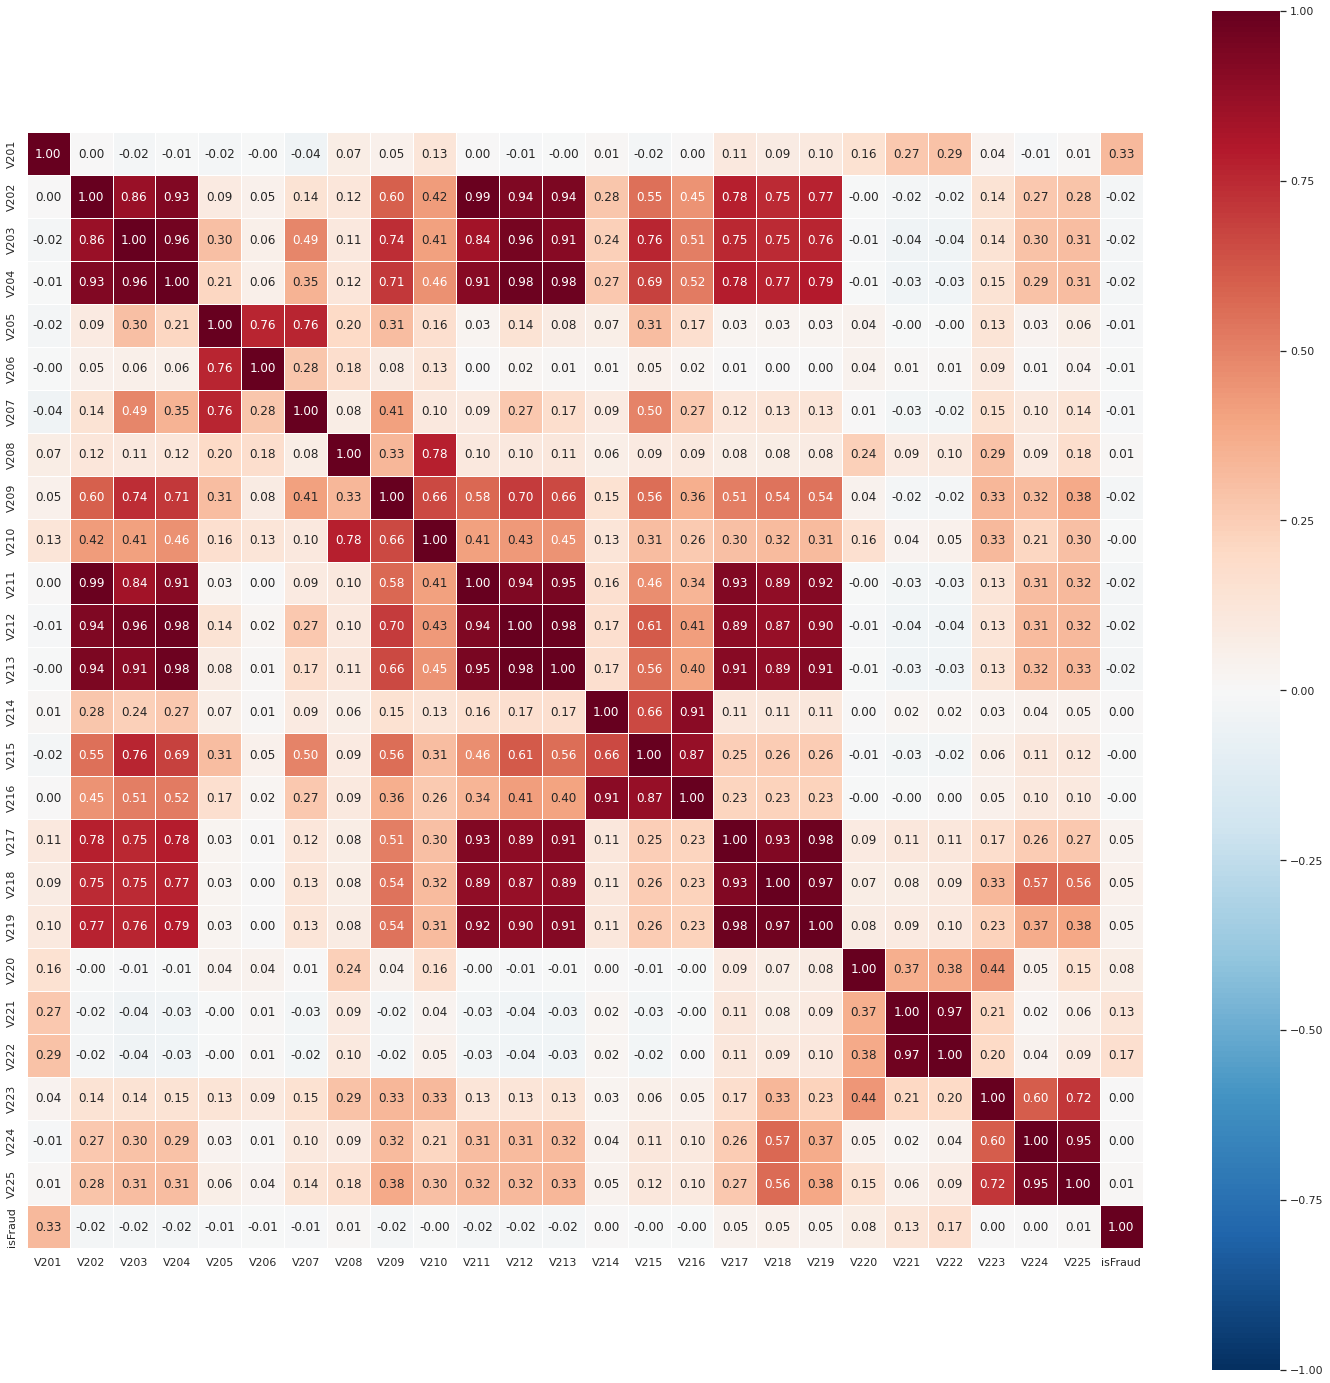

In [24]:
cols = ['V'+str(x) for x in range(201,226)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list9 = high_correlated_cols(train_df[cols], plot=False)

In [25]:
drop_list9

['V203',
 'V204',
 'V211',
 'V212',
 'V213',
 'V216',
 'V217',
 'V218',
 'V219',
 'V222',
 'V225']

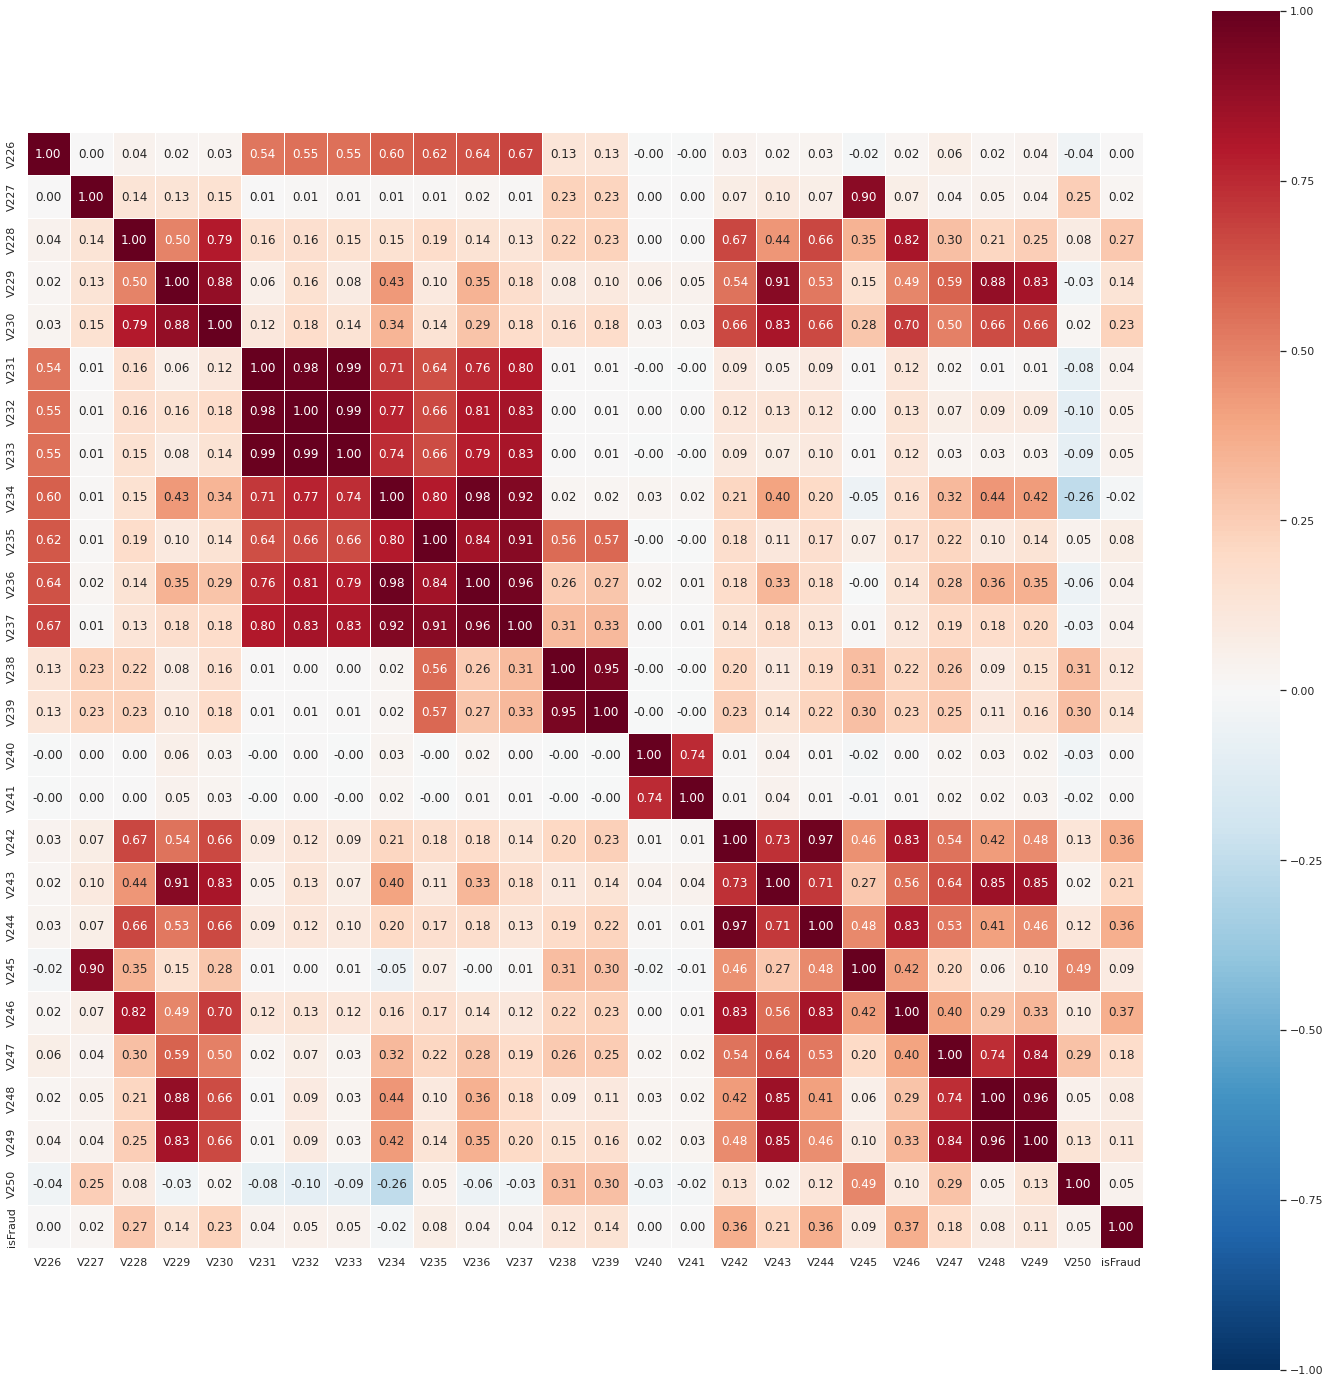

In [26]:
cols = ['V'+str(x) for x in range(226,251)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list10 = high_correlated_cols(train_df[cols], plot=False)

In [27]:
drop_list10

['V230',
 'V232',
 'V233',
 'V236',
 'V237',
 'V239',
 'V243',
 'V244',
 'V245',
 'V248',
 'V249']

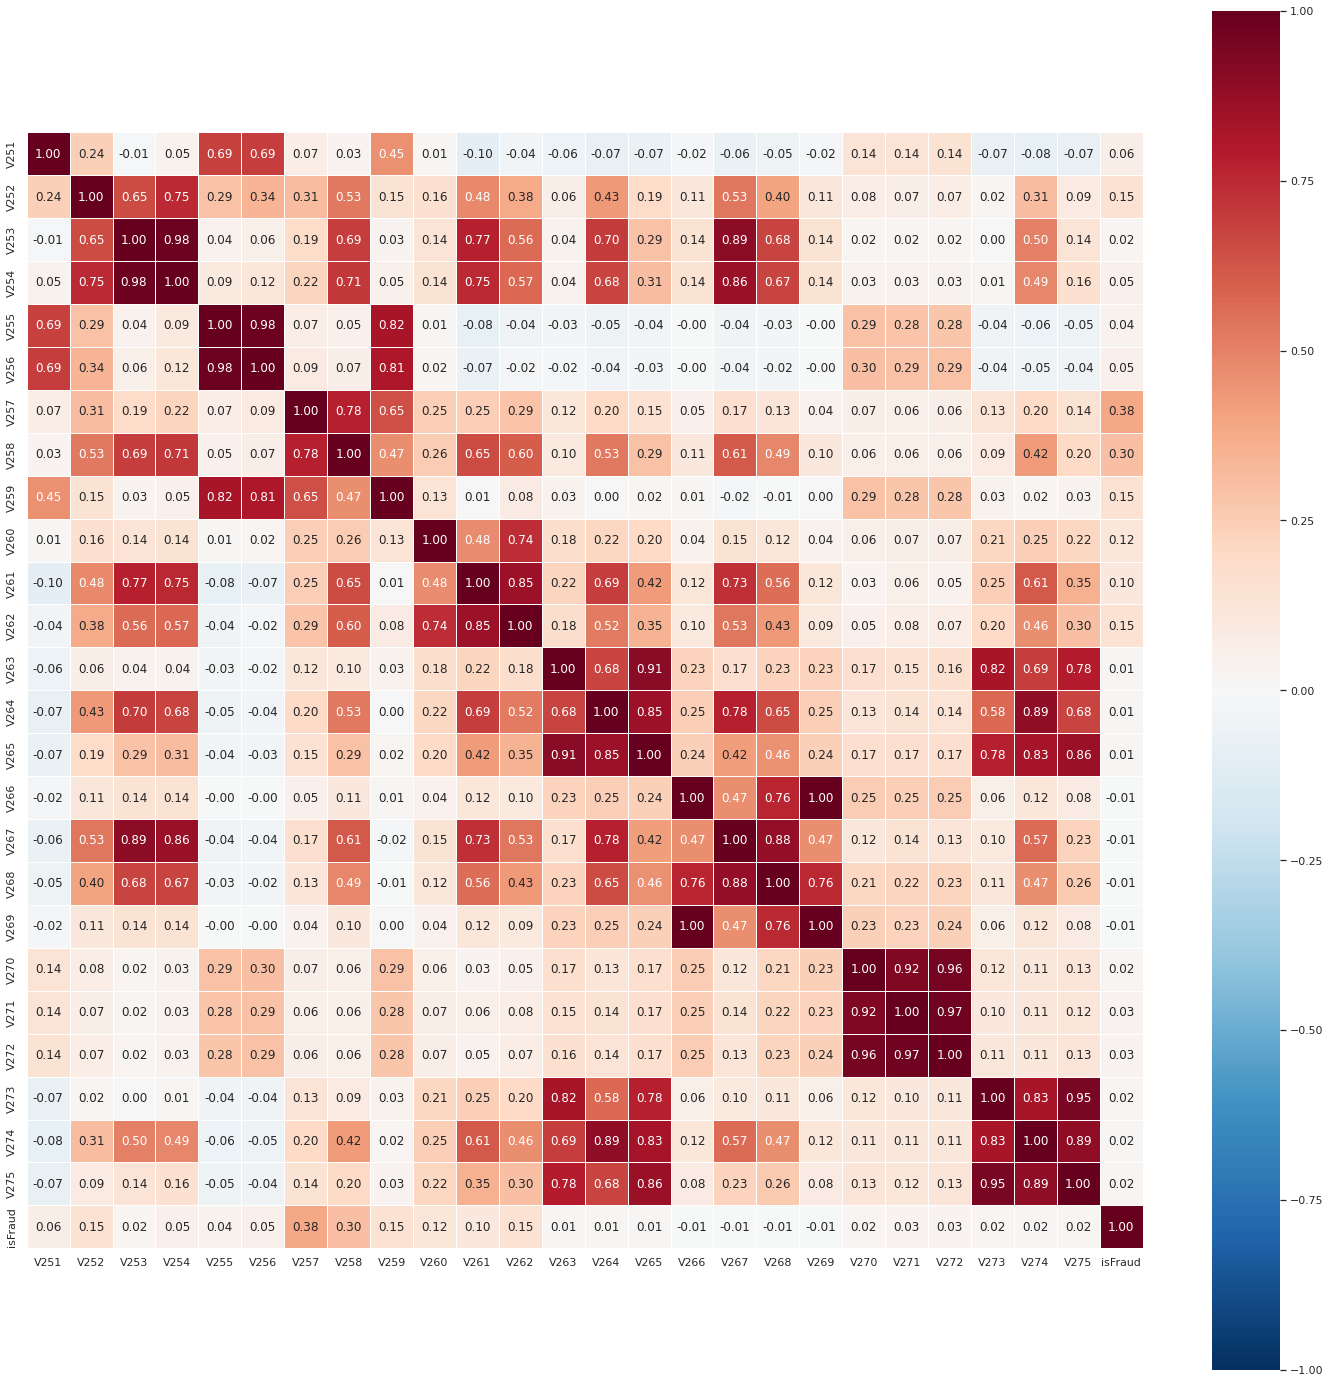

In [28]:
cols = ['V'+str(x) for x in range(251,276)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list11 = high_correlated_cols(train_df[cols], plot=False)

In [29]:
drop_list11

['V254',
 'V256',
 'V262',
 'V265',
 'V267',
 'V268',
 'V269',
 'V271',
 'V272',
 'V274',
 'V275']

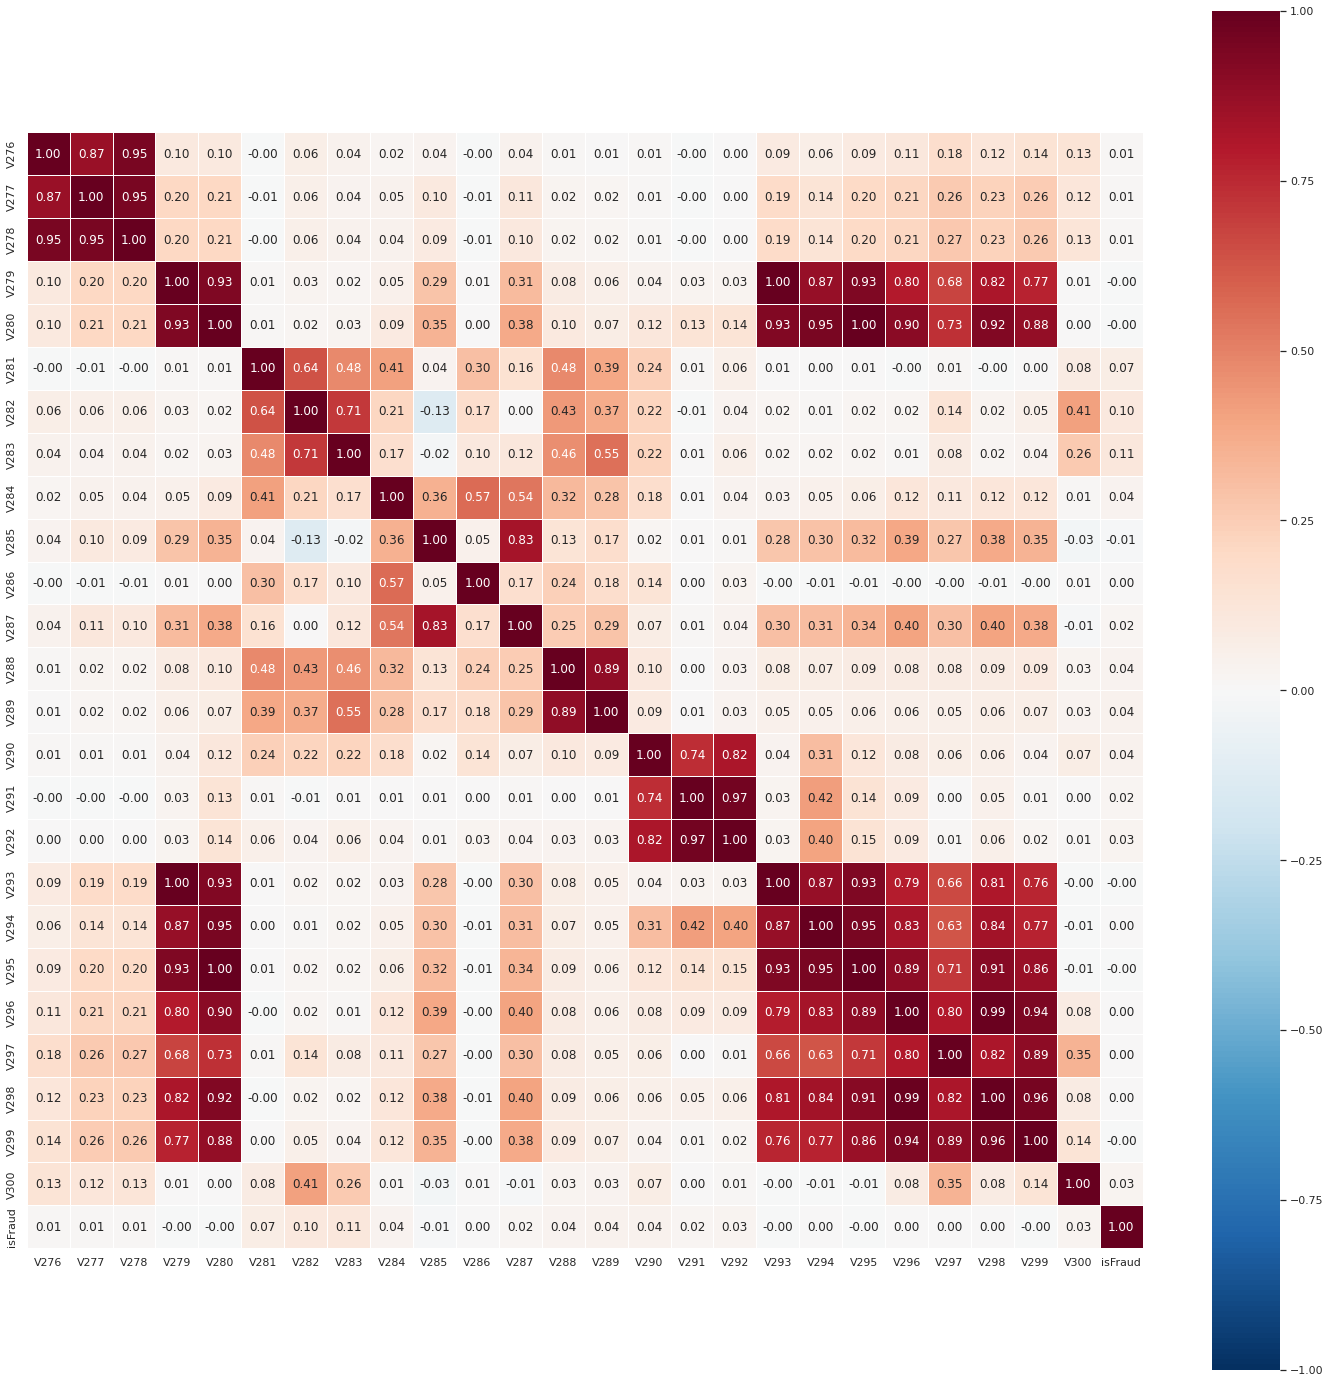

In [30]:
cols = ['V'+str(x) for x in range(276,301)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list12 = high_correlated_cols(train_df[cols], plot=False)

In [31]:
drop_list12

['V277',
 'V278',
 'V280',
 'V289',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V298',
 'V299']

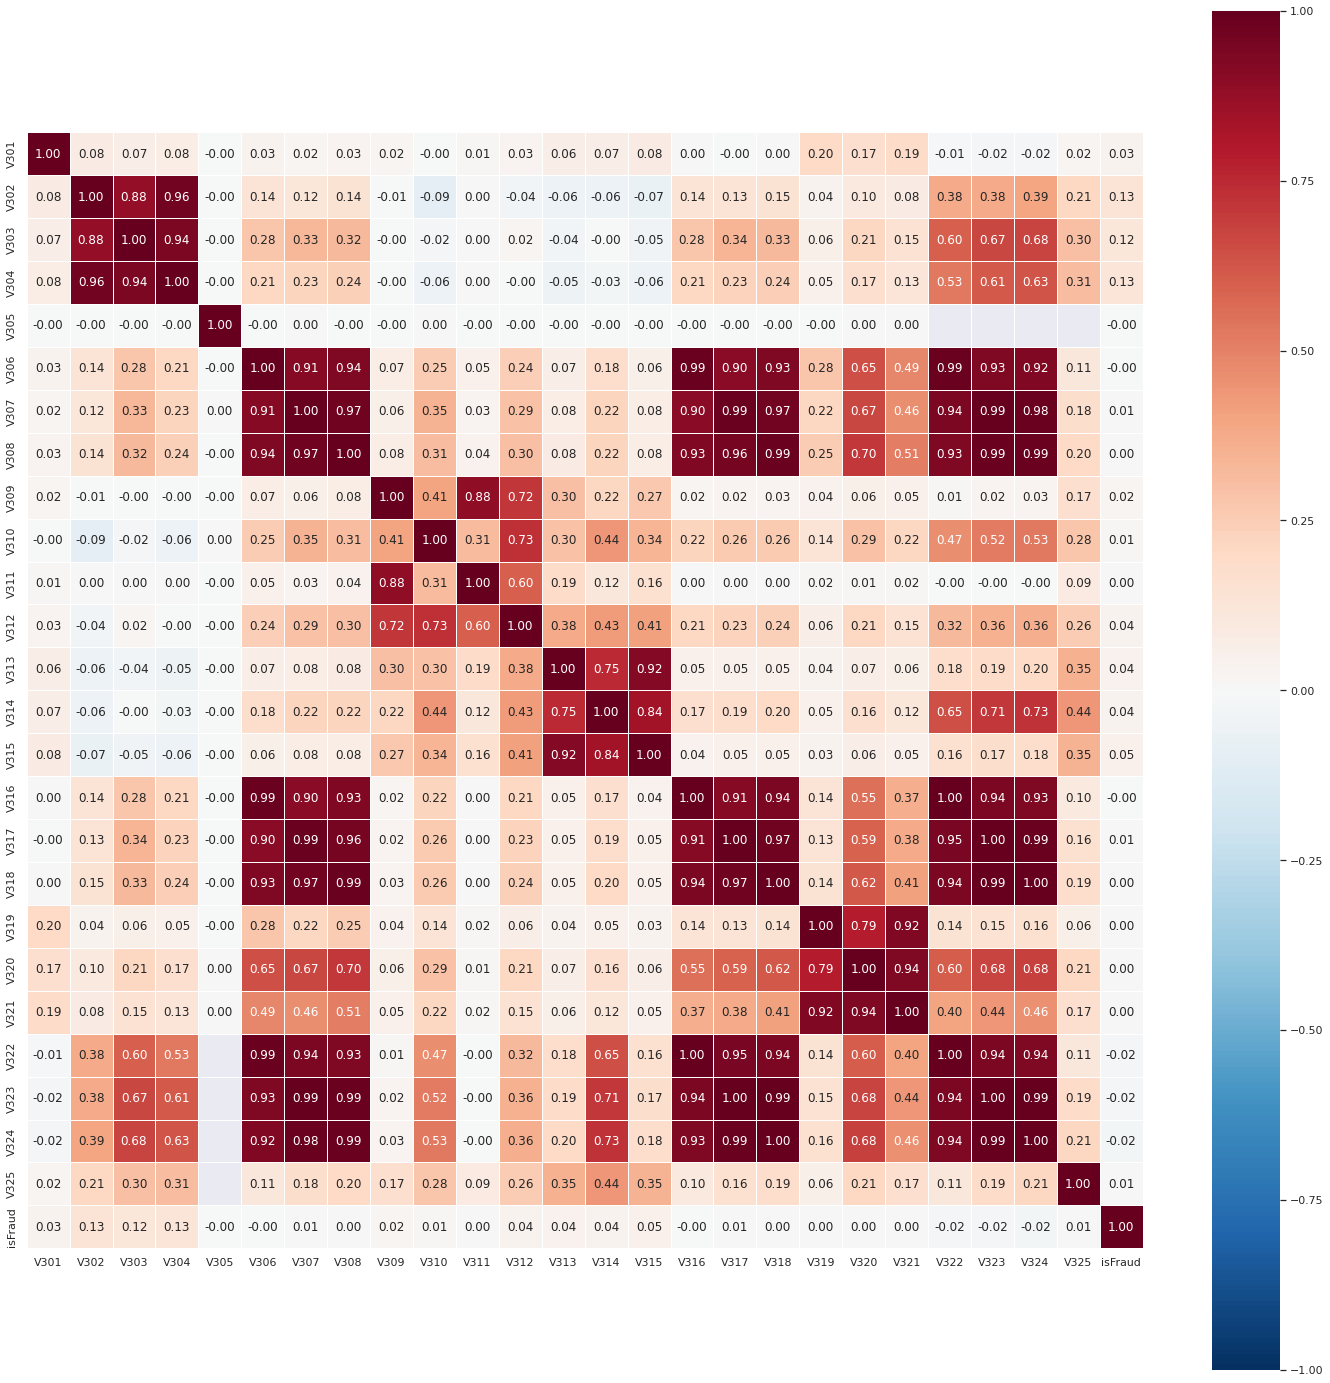

In [32]:
cols = ['V'+str(x) for x in range(301,326)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list13 = high_correlated_cols(train_df[cols], plot=False)

In [33]:
drop_list13

['V303',
 'V304',
 'V307',
 'V308',
 'V311',
 'V315',
 'V316',
 'V317',
 'V318',
 'V321',
 'V322',
 'V323',
 'V324']

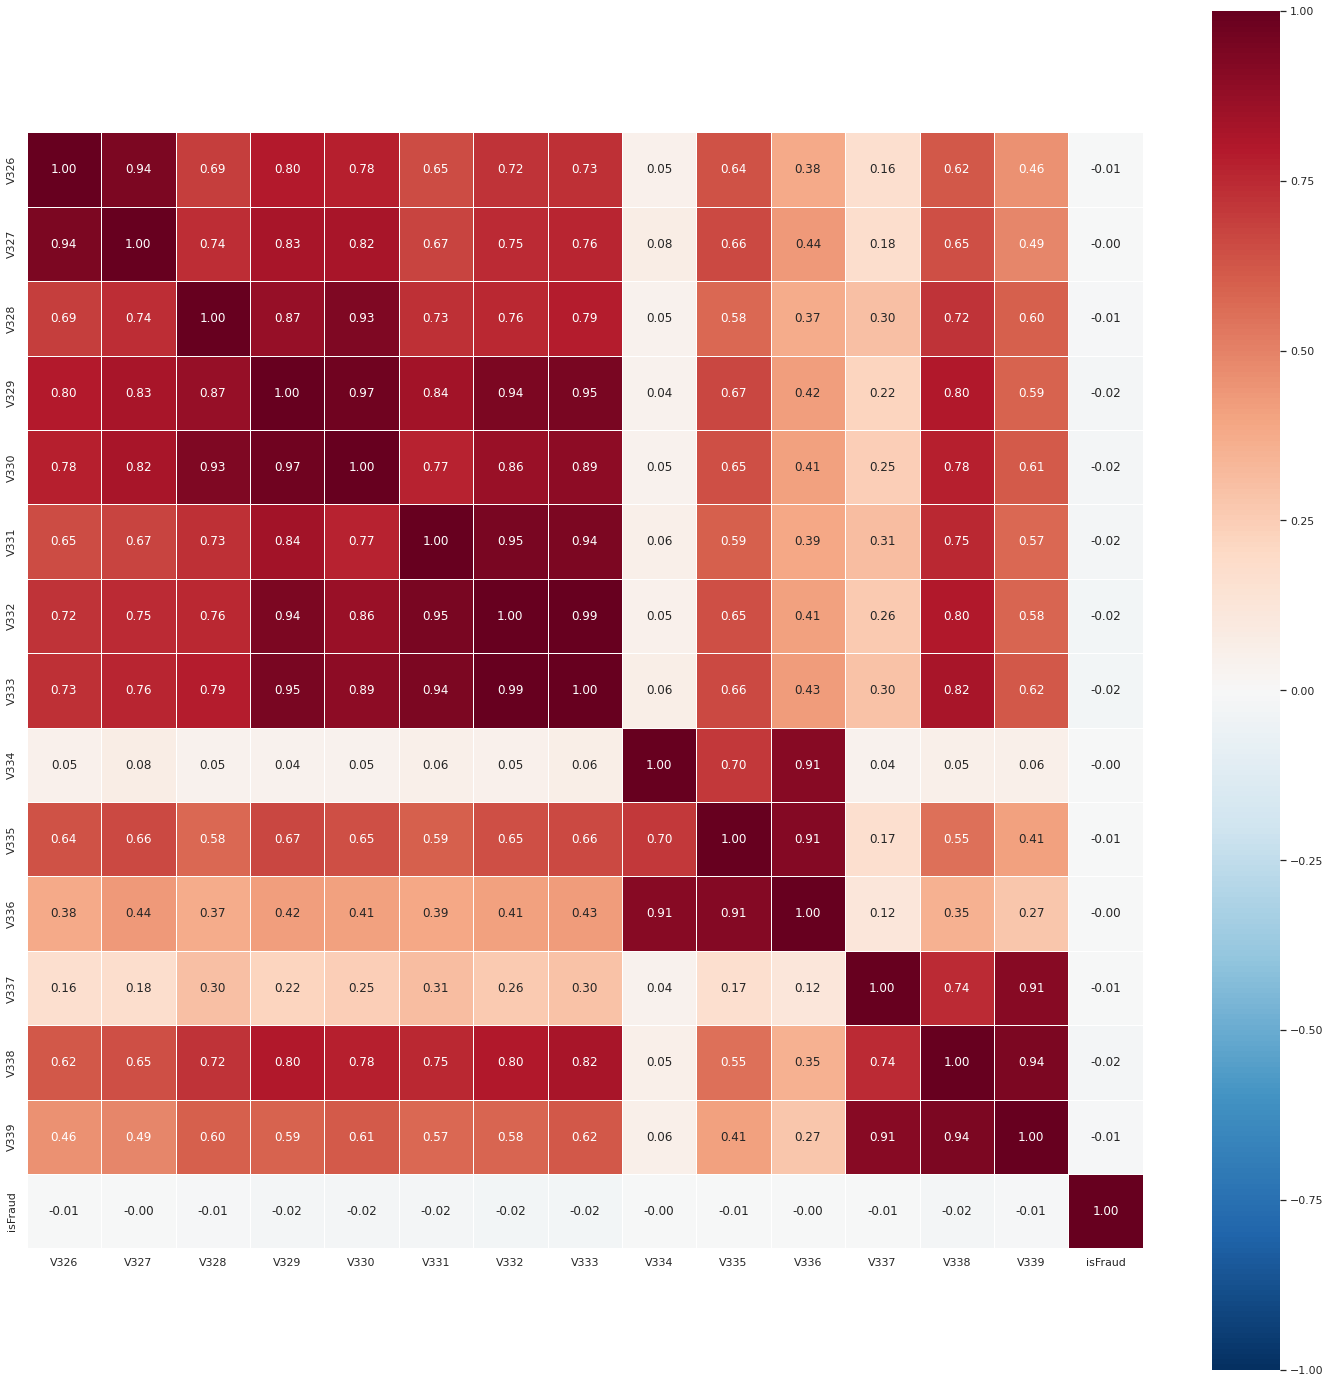

In [34]:
cols = ['V'+str(x) for x in range(326,340)]
cols = cols + ["isFraud"]
high_correlated_cols(train_df[cols], plot=True)
drop_list14 = high_correlated_cols(train_df[cols], plot=False)

In [35]:
drop_list14

['V327', 'V329', 'V330', 'V332', 'V333', 'V336', 'V339']

In [36]:
drop_list_vfeatures = drop_list1 + drop_list2 + drop_list3 + drop_list4 + drop_list5 + drop_list6 + drop_list7 + drop_list8 + \
drop_list9 + drop_list10 + drop_list11 + drop_list12 + drop_list13 + drop_list14

In [37]:
len(drop_list_vfeatures)

155

In [38]:
vfeatures = ['V'+str(x) for x in range(1,340)]

### Reanalyzing for the remaining v variables

In [39]:
reduce_vfeatures = [col for col in vfeatures if col not in drop_list_vfeatures]
drop_list_last = high_correlated_cols(train_df[reduce_vfeatures], plot=False)

In [40]:
drop_list_last

['V29',
 'V31',
 'V39',
 'V41',
 'V51',
 'V59',
 'V65',
 'V68',
 'V69',
 'V76',
 'V79',
 'V80',
 'V88',
 'V89',
 'V90',
 'V101',
 'V126',
 'V151',
 'V153',
 'V164',
 'V177',
 'V181',
 'V201',
 'V202',
 'V206',
 'V207',
 'V228',
 'V231',
 'V235',
 'V251',
 'V253',
 'V257',
 'V259',
 'V263',
 'V266',
 'V273',
 'V276',
 'V279',
 'V285',
 'V287',
 'V297',
 'V301',
 'V302',
 'V306',
 'V309',
 'V312',
 'V319',
 'V320',
 'V325',
 'V326',
 'V328',
 'V331',
 'V334',
 'V335',
 'V338']

In [41]:
drop_list_vfeatures = drop_list_vfeatures + drop_list_last

In [42]:
len(drop_list_vfeatures)

210

In [43]:
reduce_vfeatures = [col for col in vfeatures if col not in drop_list_vfeatures]

# id columns

### Analyzing ids Features

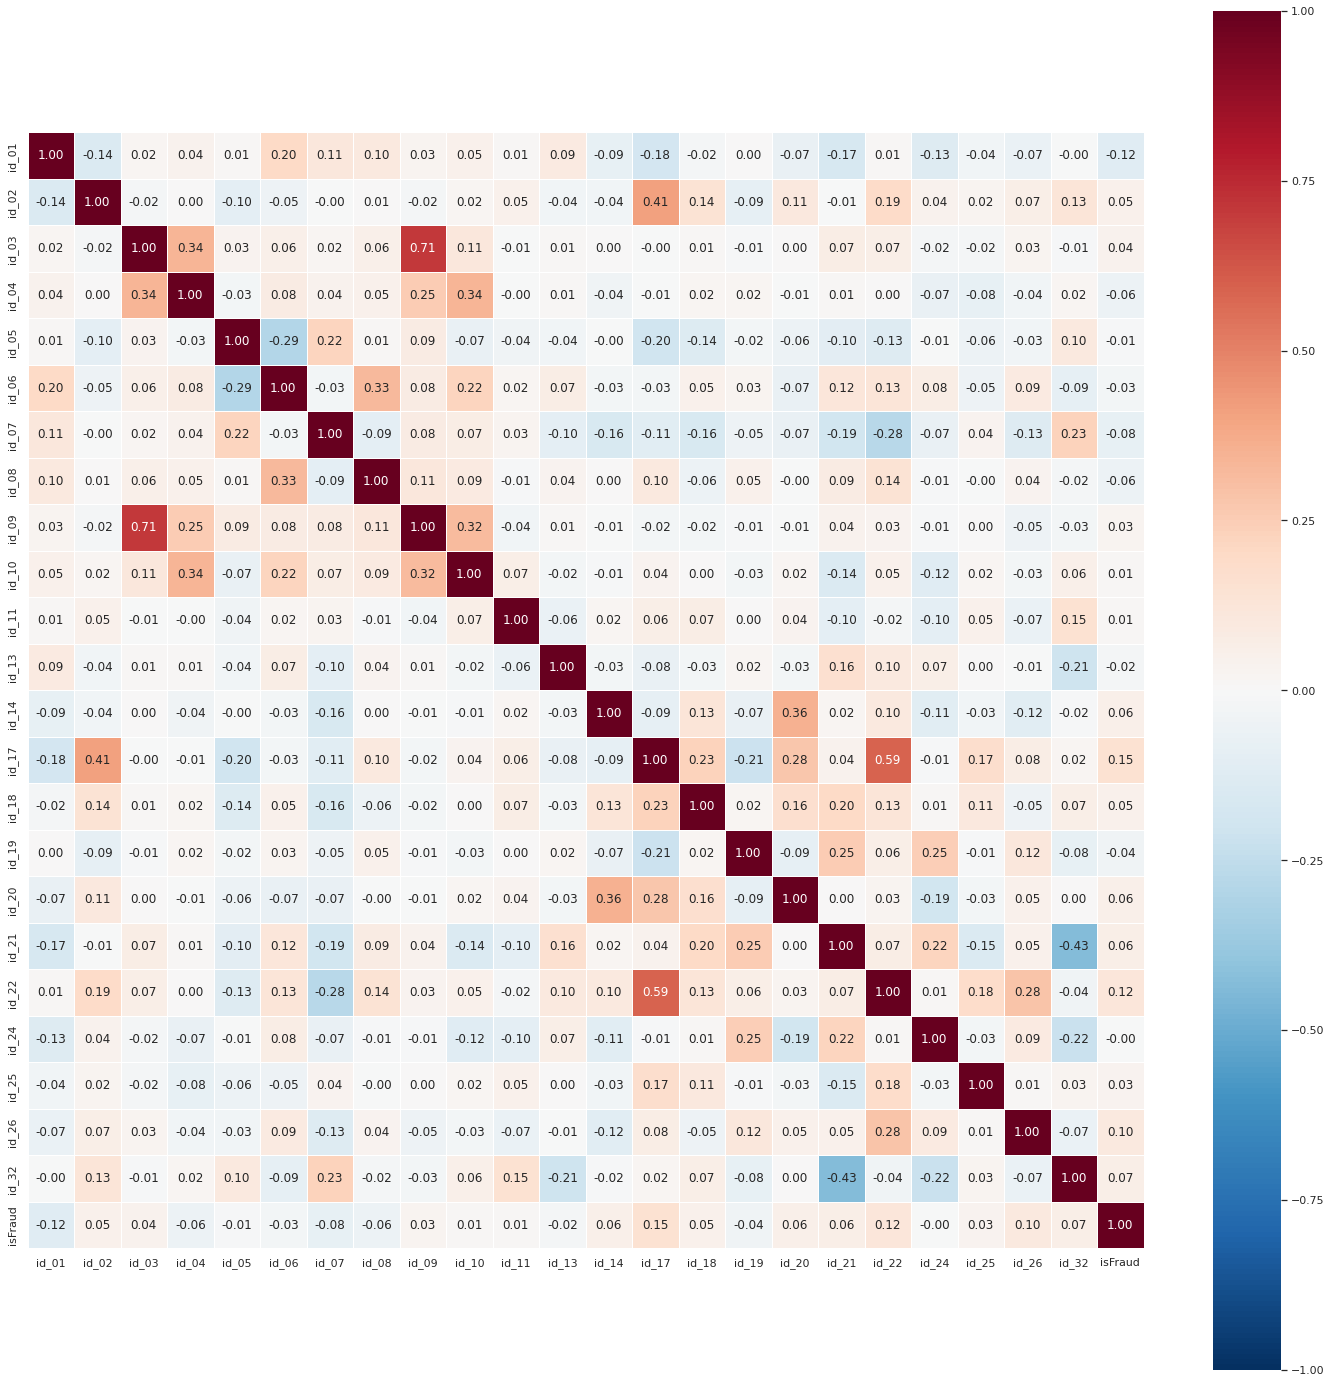

In [44]:
id_cols = [col for col in train_df.columns if col[0]+col[1] == 'id']
id_cols = id_cols + ["isFraud"]
high_correlated_cols(train_df[id_cols], plot=True)
drop_list_id = high_correlated_cols(train_df[id_cols], plot=False)

In [45]:
drop_list_id

[]

# C columns

### Analyzing Cs Features

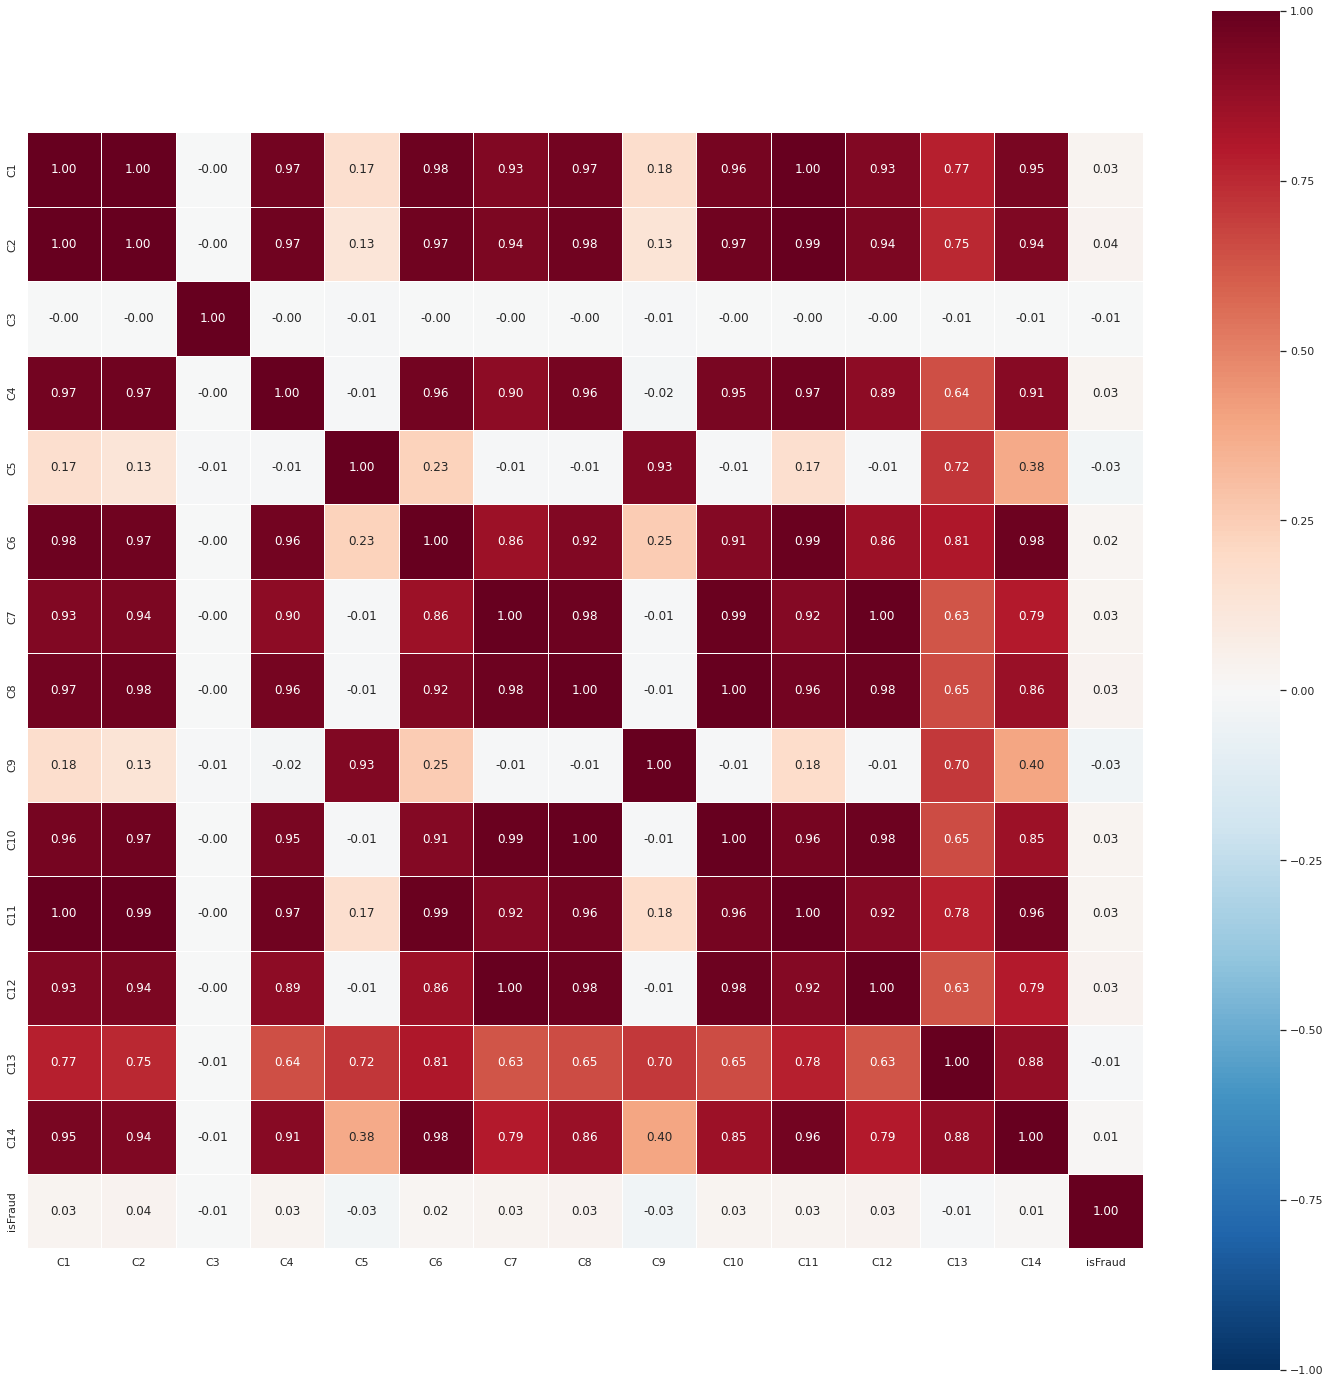

In [46]:
c_cols = [col for col in train_df.columns if col[0] == 'C']
c_cols = c_cols + ["isFraud"]
high_correlated_cols(train_df[c_cols], plot=True)
drop_list_c = high_correlated_cols(train_df[c_cols], plot=False)

In [47]:
drop_list_c

['C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C14']

# D columns

### Analyzing Ds Features

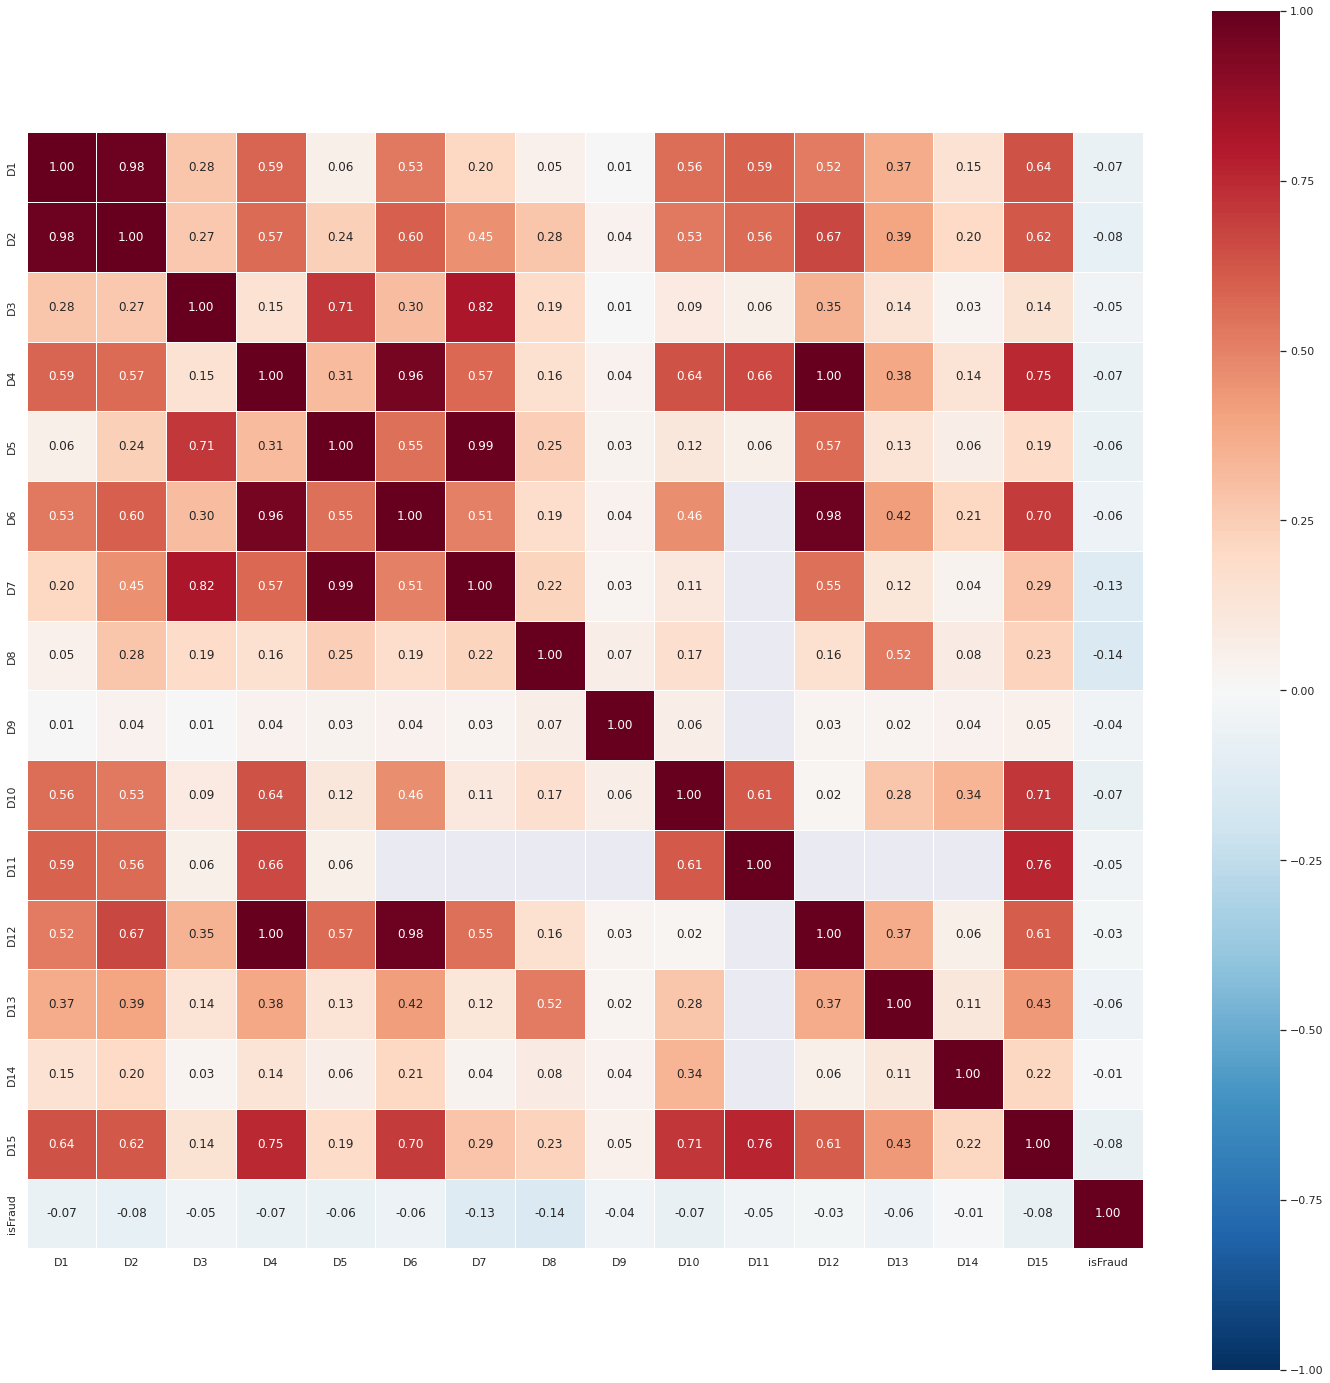

In [48]:
d_cols = [col for col in train_df.columns if col[0] == 'D']
d_cols = d_cols + ["isFraud"]
high_correlated_cols(train_df[d_cols], plot=True)
drop_list_d = high_correlated_cols(train_df[d_cols], plot=False)

In [49]:
drop_list_d

['D2', 'D6', 'D7', 'D12']

# V Variables with Low Effect by Feature Importance

In [50]:
vfeatures_importance = []
for i in train_df.columns:
    if 'V' in i:
        vfeatures_importance.append(i)

In [51]:
vfeatures_importance.append('isFraud')

In [52]:
len(vfeatures_importance)

340

In [53]:
v_train = train_df[:412785]
v_cv = train_df[412785:]

In [54]:
v_train = v_train[vfeatures_importance]
v_cv = v_cv[vfeatures_importance]

In [55]:
v_train_x  = v_train.drop(['isFraud'],axis=1)
v_train_y = v_train['isFraud']
v_cv_x = v_cv.drop(['isFraud'],axis=1)
v_cv_y = v_cv['isFraud']

In [56]:
v_train_x.fillna(v_train_x.mean(),inplace=True)
v_cv_x.fillna(v_cv_x.mean(),inplace=True)

### LightGBM Modelling

In [57]:
rf = LGBMClassifier()
rf.fit(v_train_x,v_train_y)
predict_y_=rf.predict_proba(v_train_x)
predict_y = rf.predict_proba(v_cv_x)
print('train auc:',roc_auc_score(v_train_y,predict_y_[:,1]))
print('cv auc:',roc_auc_score(v_cv_y,predict_y[:,1]))

train auc: 0.8838113575059537
cv auc: 0.8081561504175101


In [58]:
g = rf.feature_importances_
j=1
vremove=[]
for i in g:
    if i<10:
        vremove.append('V'+str(j))
    j+=1

In [59]:
for i in vremove:
    vfeatures_importance.remove(i)
    print('removed:',i)

removed: V1
removed: V2
removed: V4
removed: V6
removed: V7
removed: V8
removed: V9
removed: V10
removed: V11
removed: V12
removed: V14
removed: V15
removed: V16
removed: V17
removed: V18
removed: V21
removed: V22
removed: V23
removed: V24
removed: V25
removed: V27
removed: V28
removed: V29
removed: V30
removed: V31
removed: V32
removed: V33
removed: V34
removed: V40
removed: V41
removed: V42
removed: V43
removed: V46
removed: V50
removed: V51
removed: V52
removed: V57
removed: V59
removed: V60
removed: V63
removed: V64
removed: V65
removed: V66
removed: V68
removed: V69
removed: V71
removed: V72
removed: V73
removed: V79
removed: V80
removed: V81
removed: V84
removed: V85
removed: V88
removed: V89
removed: V90
removed: V92
removed: V93
removed: V95
removed: V97
removed: V98
removed: V100
removed: V101
removed: V103
removed: V104
removed: V105
removed: V106
removed: V107
removed: V108
removed: V109
removed: V110
removed: V111
removed: V112
removed: V113
removed: V114
removed: V115
remo

In [60]:
drop_list_vfeatures = [col for col in vremove if col in  drop_list_vfeatures] 

# Final Features


In [61]:
drop_total = drop_list_vfeatures + drop_list_id + drop_list_c + drop_list_d
drop_total

['V11',
 'V16',
 'V18',
 'V21',
 'V22',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V40',
 'V41',
 'V42',
 'V43',
 'V50',
 'V51',
 'V52',
 'V57',
 'V59',
 'V60',
 'V63',
 'V64',
 'V65',
 'V68',
 'V69',
 'V71',
 'V72',
 'V73',
 'V79',
 'V80',
 'V81',
 'V84',
 'V85',
 'V88',
 'V89',
 'V90',
 'V92',
 'V93',
 'V97',
 'V101',
 'V103',
 'V105',
 'V106',
 'V113',
 'V119',
 'V128',
 'V132',
 'V134',
 'V137',
 'V142',
 'V143',
 'V145',
 'V150',
 'V151',
 'V153',
 'V154',
 'V155',
 'V157',
 'V159',
 'V162',
 'V163',
 'V167',
 'V168',
 'V177',
 'V178',
 'V179',
 'V181',
 'V182',
 'V183',
 'V190',
 'V191',
 'V192',
 'V193',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V202',
 'V203',
 'V204',
 'V211',
 'V212',
 'V216',
 'V217',
 'V218',
 'V219',
 'V222',
 'V225',
 'V228',
 'V230',
 'V231',
 'V232',
 'V233',
 'V235',
 'V236',
 'V237',
 'V239',
 'V243',
 'V244',
 'V248',
 'V249',
 'V251',
 'V253',
 'V254',
 'V256',
 'V257',
 'V259',
 'V262',
 'V263',
 'V265',
 'V268',
 'V269',
 'V271

In [62]:
reduce_total = [col for col in train_df.columns if col not in drop_total]
reduce_total

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C3',
 'C5',
 'C13',
 'D1',
 'D3',
 'D4',
 'D5',
 'D8',
 'D9',
 'D10',
 'D11',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V12',
 'V13',
 'V14',
 'V15',
 'V17',
 'V19',
 'V20',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V53',
 'V54',
 'V55',
 'V56',
 'V58',
 'V61',
 'V62',
 'V66',
 'V67',
 'V70',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V82',
 'V83',
 'V86',
 'V87',
 'V91',
 'V94',
 'V95',
 'V96',
 'V98',
 'V99',
 'V100',
 'V102',
 'V104',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V120',
 'V121',
 'V122',
 

In [63]:
new_cols = [col for col in train_df.columns if col not in vremove]

In [64]:
new_cols2 = [col for col in test_df.columns if col in new_cols]

In [65]:
train_df.drop(drop_total, inplace=True, axis=1)

In [66]:
test_df.drop(drop_total, inplace=True, axis=1)

In [67]:
train_df.shape

(590540, 268)

In [68]:
test_df.shape

(506691, 267)